In [2]:
#Importing our libraries
import pandas as pd
import numpy as np
from numpy import argmax
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA

In [50]:
#Importing our data, using the delimiter parameter to seperate the columns and the values
df1=pd.read_csv("data.csv",delimiter=';')
df=df1.copy()


In [51]:
#Checking the general information about our dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
#Converting features' datatypes to more appropriate datatypes
df['Marital status']= df['Marital status'].astype('category')
df['Application mode']=df['Application mode'].astype('category')
df['Course']=df['Course'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Daytime/evening attendance\t']=df['Daytime/evening attendance\t'].astype('category')
df['Target']=df['Target'].astype('category')
df['International']=df['International'].astype('category')
df['Scholarship holder']=df['Scholarship holder'].astype('category')
df['Debtor']=df['Debtor'].astype('category')
df['Displaced']=df['Displaced'].astype('category')
df['Tuition fees up to date']=df['Tuition fees up to date'].astype('category')
df['Application order']=df['Application order'].astype('category')
df['Nacionality']=df['Nacionality'].astype('category')
df['Educational special needs']=df['Educational special needs'].astype('category')
df['Target']=df['Target'].astype('category')
df['Previous qualification']=df['Previous qualification'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

In [7]:
df.describe()

Previous qualification (grade)  Mother's qualification  \
count                     4424.000000             4424.000000   
mean                       132.613314               19.561935   
std                         13.188332               15.603186   
min                         95.000000                1.000000   
25%                        125.000000                2.000000   
50%                        133.100000               19.000000   
75%                        140.000000               37.000000   
max                        190.000000               44.000000   

       Father's qualification  Mother's occupation  Father's occupation  \
count             4424.000000          4424.000000          4424.000000   
mean                22.275316            10.960895            11.032324   
std                 15.343108            26.418253            25.263040   
min                  1.000000             0.000000             0.000000   
25%                  3.000000             4.000000             4.000000   
50%                 19.000000             5.000000             7.000000   
75%                 37.000000             9.000000             9.000000   
max                 44.000000           194.000000           195.000000   

       Admission grade  Age at enrollment  \
count      4424.000000        4424.000000   
mean        126.978119          23.265145   
std          14.482001           7.587816   
min          95.000000          17.000000   
25%         117.900000          19.000000   
50%         126.100000          20.000000   
75%         134.800000          25.000000   
max         190.000000          70.000000   

       Curricular units 1st sem (credited)  \
count                          4424.000000   
mean                              0.709991   
std                               2.360507   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              20.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              6.270570   
std                               2.480178   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              26.000000   

       Curricular units 1st sem (evaluations)  ...  \
count                             4424.000000  ...   
mean                                 8.299051  ...   
std                                  4.179106  ...   
min                                  0.000000  ...   
25%                                  6.000000  ...   
50%                                  8.000000  ...   
75%                                 10.000000  ...   
max                                 45.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
m

In [8]:
#mean value of each of the features of our dataset
df.mean(numeric_only=True)

Previous qualification (grade)                    132.613314
Mother's qualification                             19.561935
Father's qualification                             22.275316
Mother's occupation                                10.960895
Father's occupation                                11.032324
Admission grade                                   126.978119
Age at enrollment                                  23.265145
Curricular units 1st sem (credited)                 0.709991
Curricular units 1st sem (enrolled)                 6.270570
Curricular units 1st sem (evaluations)              8.299051
Curricular units 1st sem (approved)                 4.706600
Curricular units 1st sem (grade)                   10.640822
Curricular units 1st sem (without evaluations)      0.137658
Curricular units 2nd sem (credited)                 0.541817
Curricular units 2nd sem (enrolled)                 6.232143
Curricular units 2nd sem (evaluations)              8.063291
Curricular units 2nd sem

In [9]:
#Checcking for duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

In [10]:
#The sum of duplicated rows if any
df.duplicated().sum()

0

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


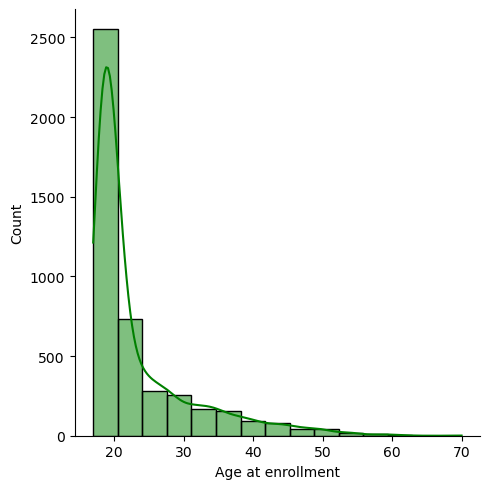

In [11]:
sns.displot(df['Age at enrollment'], bins=15, kde=True, color='green')
plt.show()

In [12]:
#Checking for the unique values of the Response(Target) feature
df['Target'].unique()

['Dropout', 'Graduate', 'Enrolled']
Categories (3, object): ['Dropout', 'Enrolled', 'Graduate']

In [13]:
Target= array(df['Target'])

In [14]:
#Checking the distribution of the Target feature elements
df['Target'].value_counts()
#Graduate----2
#Enrolled----1
#Dropout-----0

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [56]:
#Using LabelEncoding to encode categorical data to numerical values
label_enc= LabelEncoder() #(creating an instance)
label_enc= label_enc.fit(df['Target'])
labels2= label_enc.transform(df['Target'])
print(labels2)
df['Target']=labels2

[0 2 0 ... 0 2 2]


In [16]:
#df = pd.get_dummies(df, columns=['Target'])

In [17]:
#df['Target'].unique()

In [18]:
df['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int32

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda_3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


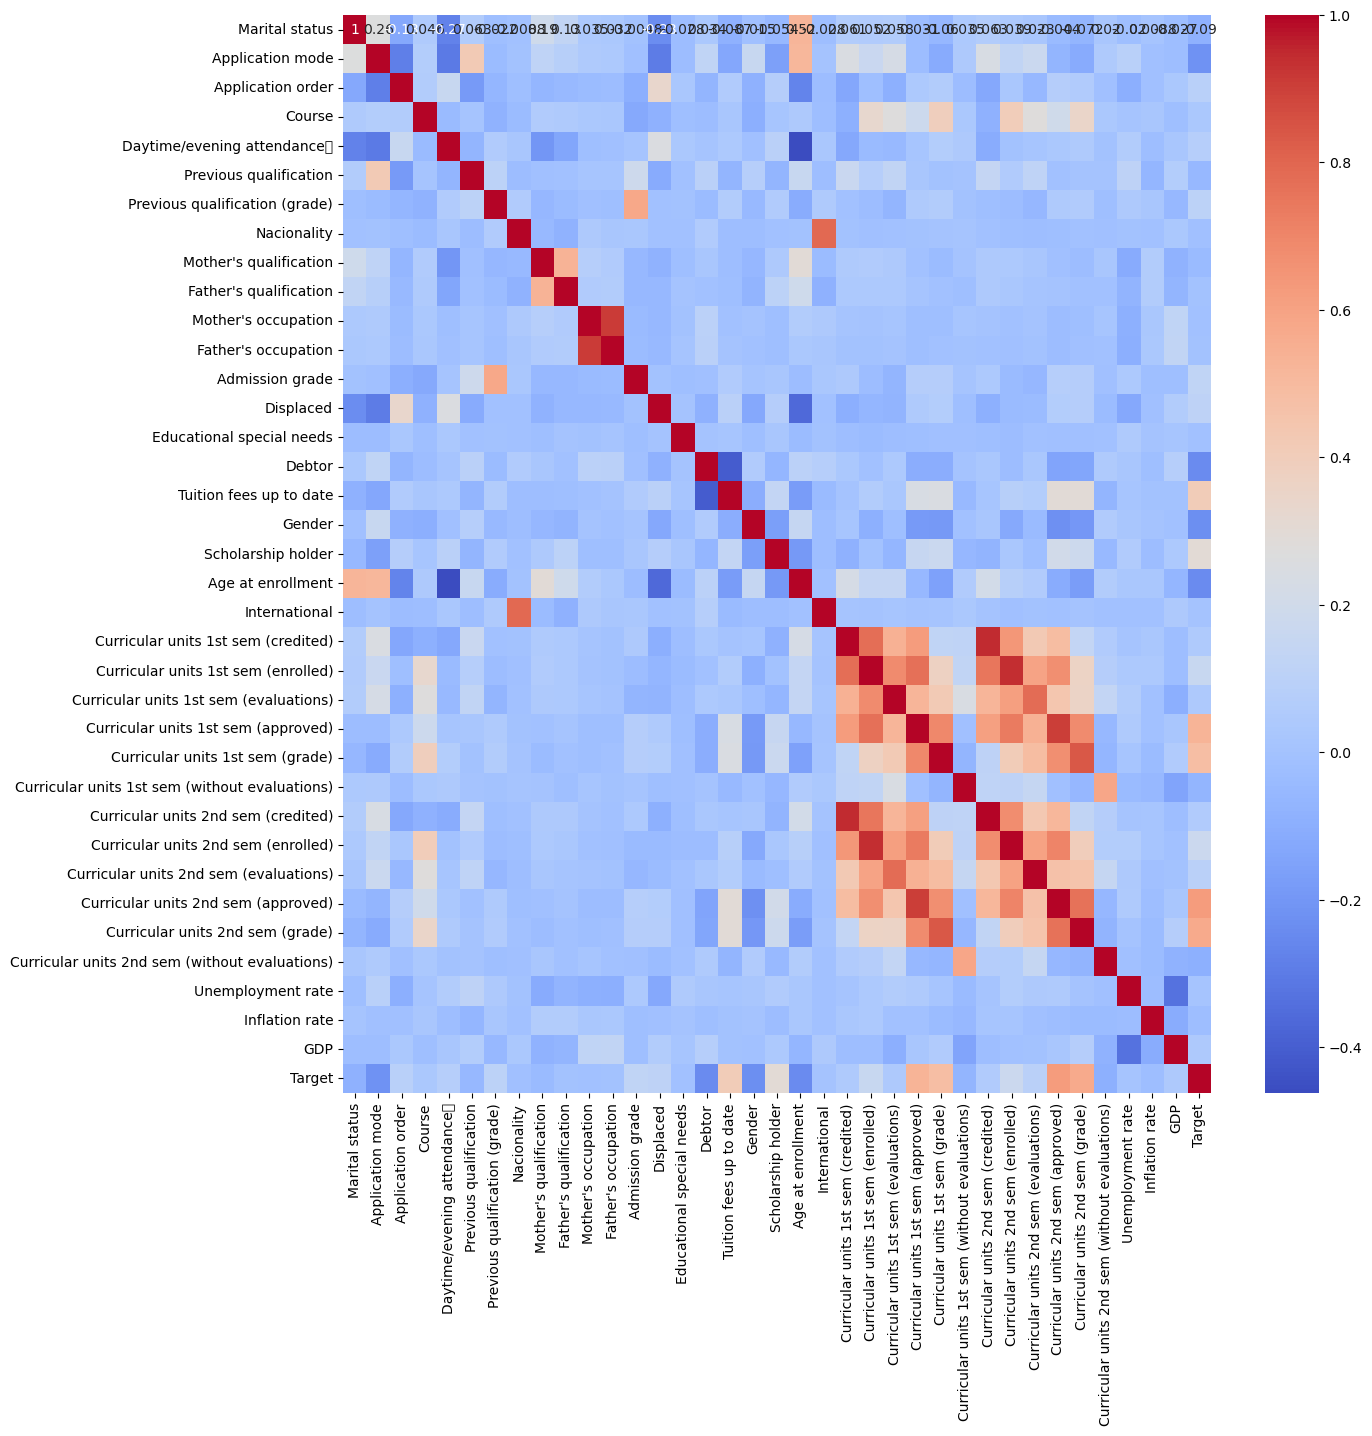

In [19]:
#Checking the correlation between the features in the dataset
mymatrix=df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(mymatrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
mymatrix

Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance\t                         -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educational special needs                            -0.028343   
Debtor                                                0.034304   
Tuition fees up to date                              -0.087158   
Gender                                               -0.014738   
Scholarship holder                                   -0.053765   
Age at enrollment                                     0.522717   
International                                        -0.027905   
Curricular units 1st sem (credited)                   0.061209   
Curricular units 1st sem (enrolled)                   0.052107   
Curricular units 1st sem (evaluations)                0.058030   
Curricular units 1st sem (approved)                  -0.031027   
Curricular units 1st sem (grade)                     -0.059811   
Curricular units 1st sem (without evaluations)        0.034711   
Curricular units 2nd sem (credited)                   0.062831   
Curricular units 2nd sem (enrolled)                   0.039026   
Curricular units 2nd sem (evaluations)                0.022784   
Curricular units 2nd sem (approved)                  -0.043739   
Curricular units 2nd sem (grade)                     -0.071506   
Curricular units 2nd sem (without evaluations)        0.020426   
Unemployment rate                                    -0.020338   
Inflation rate                                        0.008761   
GDP                                                  -0.027003   
Target                                               -0.089804   

                                                Application mode  \
Marital status                                          0.264006   
Application mode                                        1.000000   
Application order                                      -0.286357   
Course                                                  0.065385   
Daytime/evening attendance\t                           -0.304092   
Previous qualification                                  0.422411   
Previous qualification (grade)                         -0.039020   
Nacionality                                            -0.000661   
Mother's qualification                                  0.118974   
Father's qualification                                  0.083276   
Mother's occupation                                     0.051600   
Father's occupation                                     0.036707   
Admission grade                                        -0.013271   
Displaced                                              -0.301197   
Educational special needs                              -0.030779   
Debtor                                                  0.122818   
Tuition fees up to date                                -0.136262   
Gender                                                  0.160130   
Scholarship holder                                     -0.163117   
Age at enrollment                                       0.516243   
International                                           0.003438   
Curricular units 1st sem (credited)        

In [21]:
#Normalizing features with numerical data types
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [22]:
df

Marital status Application mode Application order Course  \
0                 1               17                 5    171   
1                 1               15                 1   9254   
2                 1                1                 5   9070   
3                 1               17                 2   9773   
4                 2               39                 1   8014   
...             ...              ...               ...    ...   
4419              1                1                 6   9773   
4420              1                1                 2   9773   
4421              1                1                 1   9500   
4422              1                1                 1   9147   
4423              1               10                 1   9773   

     Daytime/evening attendance\t Previous qualification  \
0                               1                      1   
1                               1                      1   
2                               1                      1   
3                               1                      1   
4                               0                      1   
...                           ...                    ...   
4419                            1                      1   
4420                            1                      1   
4421                            1                      1   
4422                            1                      1   
4423                            1                      1   

      Previous qualification (grade) Nacionality  Mother's qualification  \
0                           0.284211           1                0.418605   
1                           0.684211           1                0.000000   
2                           0.284211           1                0.837209   
3                           0.284211           1                0.860465   
4                           0.052632           1                0.837209   
...                              ...         ...                     ...   
4419                        0.315789           1                0.000000   
4420                        0.263158         105                0.000000   
4421                        0.621053           1                0.837209   
4422                        0.894737           1                0.837209   
4423                        0.600000          22                0.860465   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                   0.255814  ...                                  0.0   
1                   0.046512  ...                                  0.0   
2                   0.837209  ...                                  0.0   
3                   0.837209  ...                                  0.0   
4                   0.860465  ...                                  0.0   
...                      ...  ...                                  ...   
4419                0.000000  ...                                  0.0   
4420                0.000000  ...                                  0.0   
4421                0.837209  ...                                  0.0   
4422                0.837209  ...                                  0.0   
4423                0.837209  ...                                  0.0   

      Curricular units 2nd sem (enrolled)  \
0                                0.000000   
1                                0.260870   
2                                0.260870   
3                                0.260870   
4                                0.260870   
...                                   ...   
4419                             0.260870   
4420                             0.260870   
4421                             0.347826   
4422                             0.217391   
4423                             0.260870   

      Curricular units 2nd sem (evaluations)  \
0                                   0.000000   
1                                   0.181818   
2               

In [23]:
def perform_ttest(df, target_col, feature_col):
    group1 = df[df[target_col] == 0][feature_col]
    group2 = df[df[target_col] == 1][feature_col]
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    return t_stat, p_value

In [24]:
features = [
    'GDP',
    'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'Age at enrollment',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Inflation rate',
    'Course',
    'Application mode'
]

In [25]:
df.to_csv('cleaned.csv,index=False')

#The statistics tests for our data with regards the Drop out students

In [26]:
#for feature in features:
 #   t_stat, p_value = perform_ttest(df, 'Target_0', feature)
  #  print(f"{feature} - T-statistic: {t_stat}, P-value: {p_value}")

In [27]:
#Statistical values for those enrolled
#for feature in features:
 #   t_stat, p_value = perform_ttest(df, 'Target_1', feature)
  #  print(f"{feature} - T-statistic: {t_stat}, P-value: {p_value}")

In [28]:
#!pip install plotly dash

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


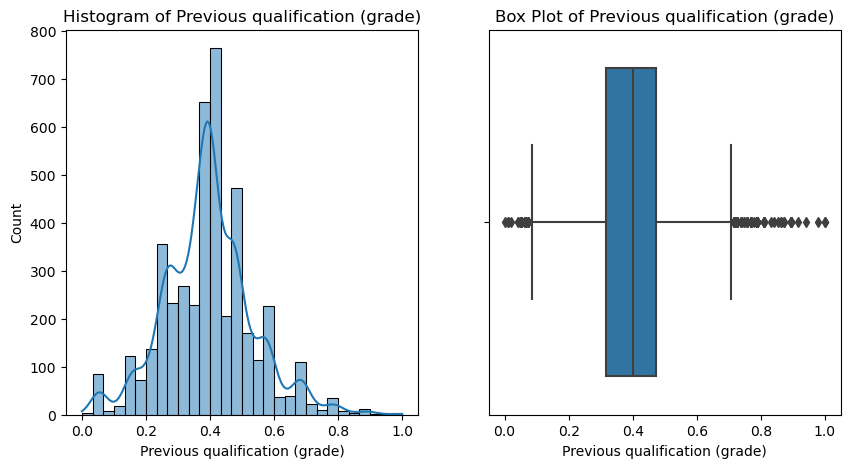

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


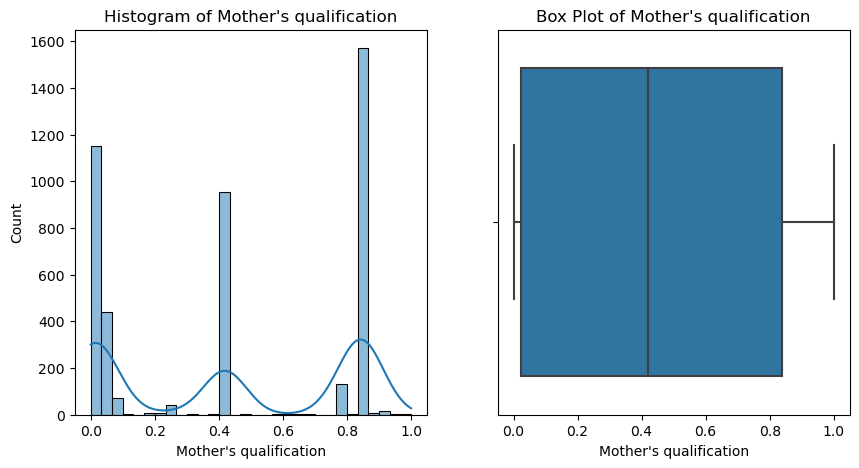

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


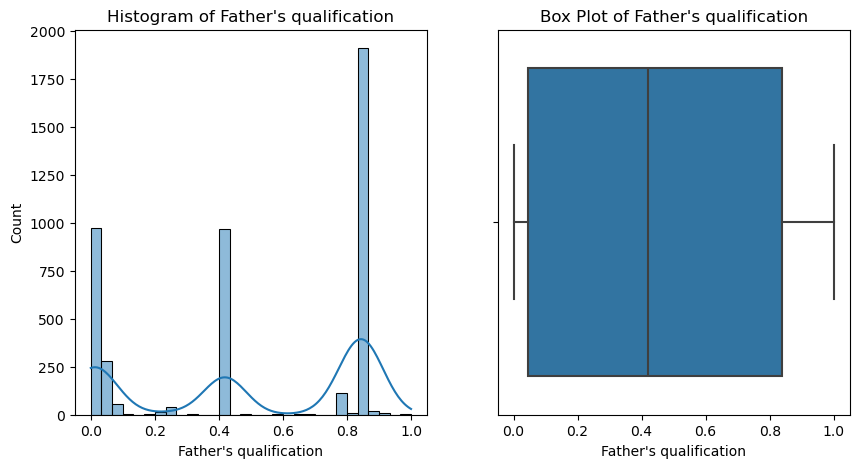

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


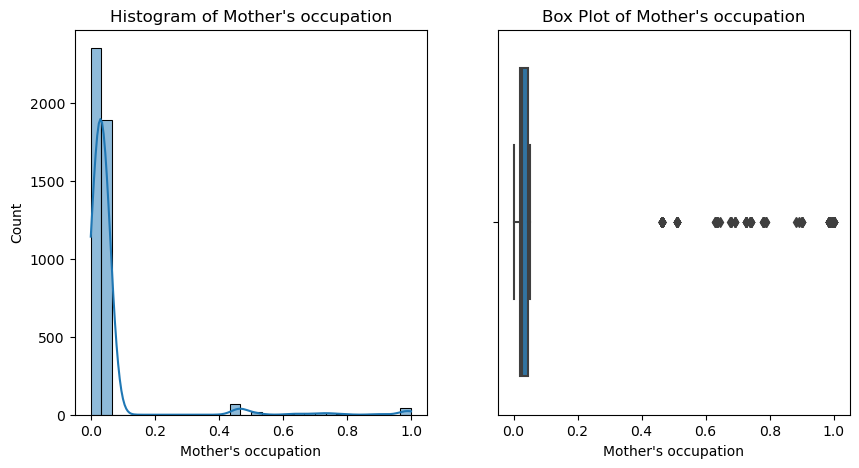

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


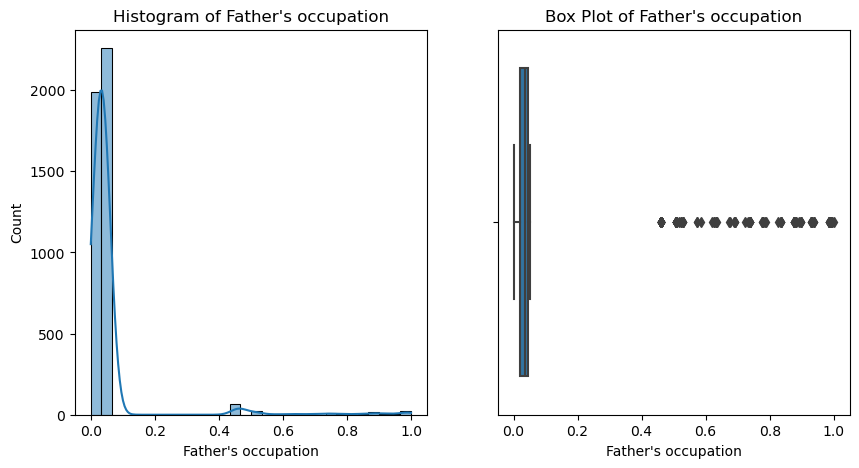

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


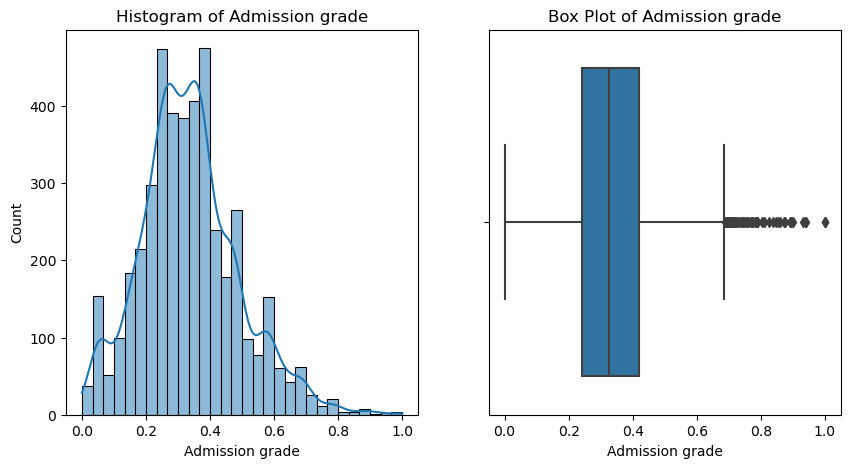

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


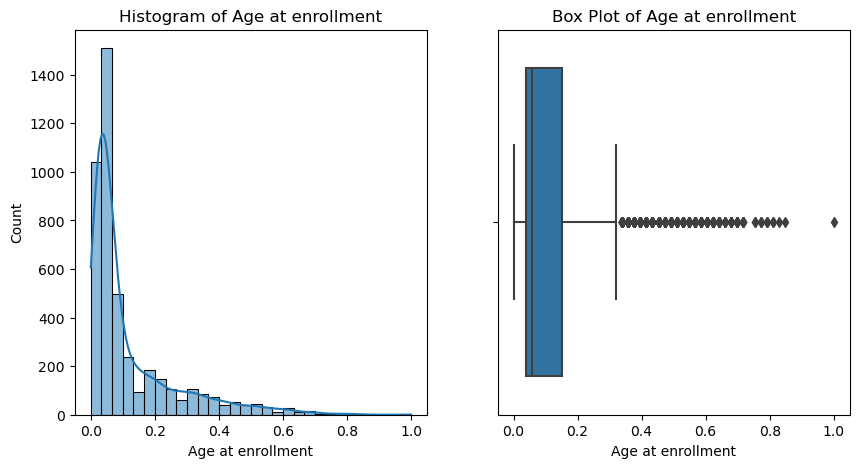

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


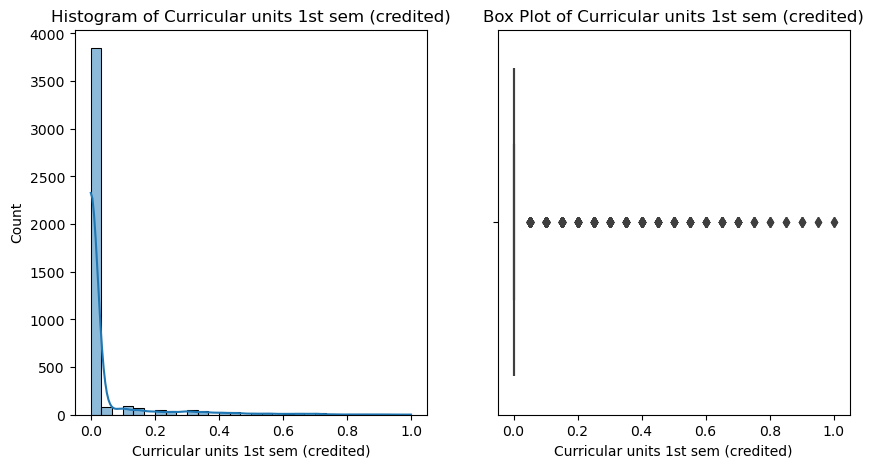

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


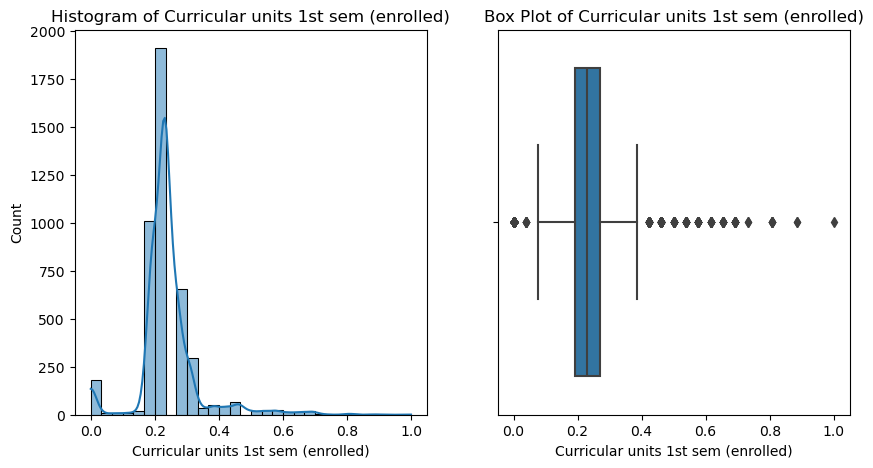

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


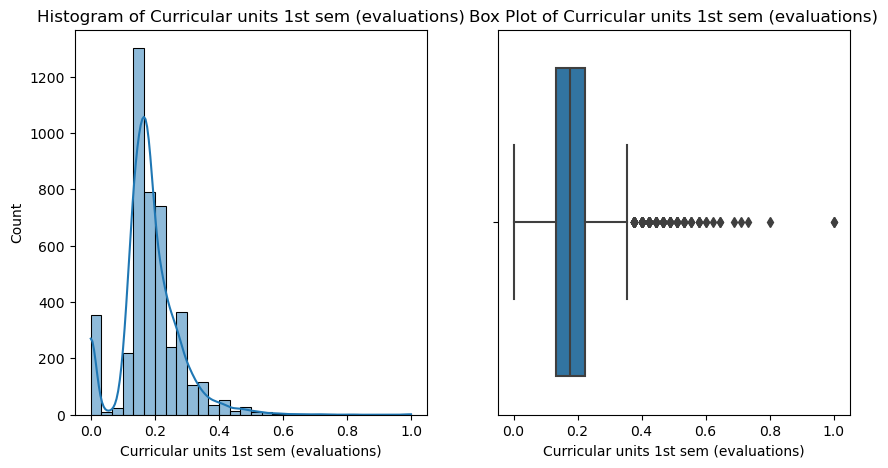

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


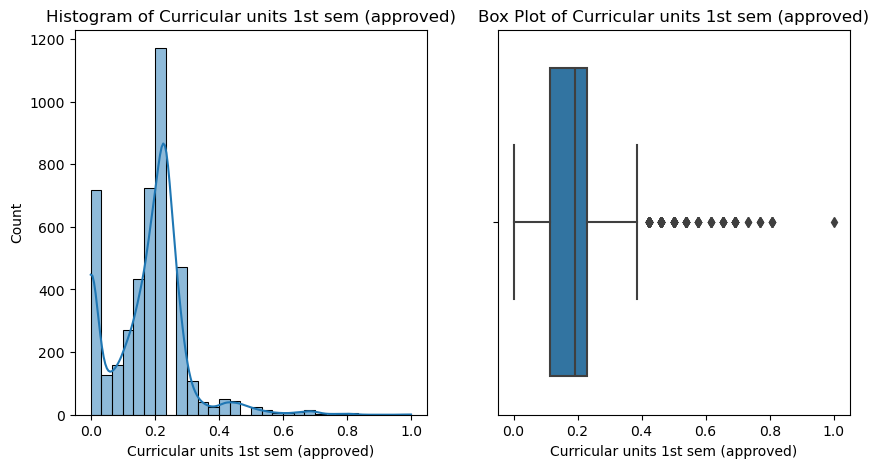

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


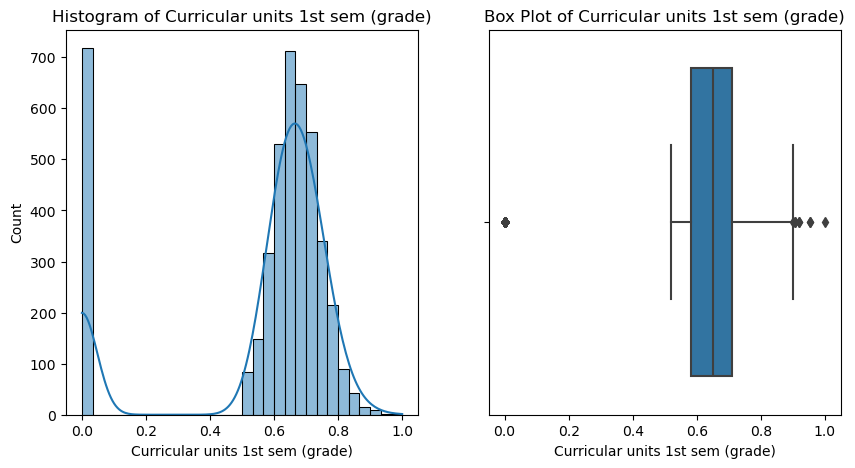

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


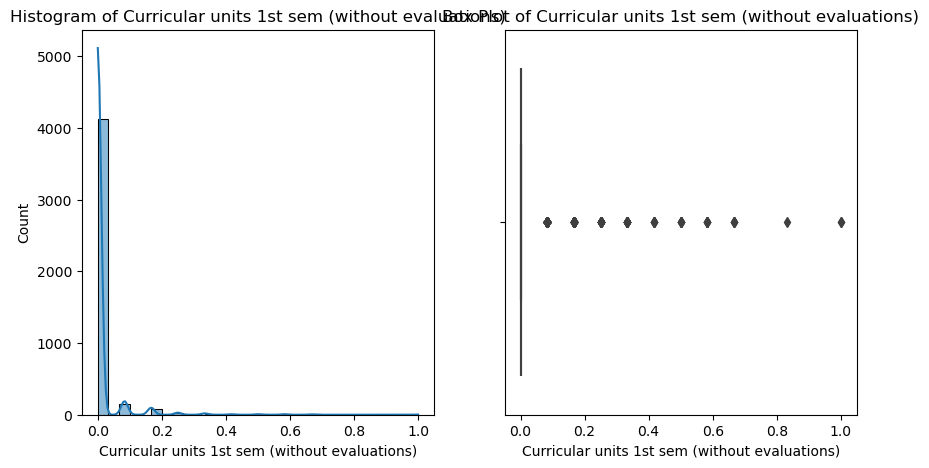

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


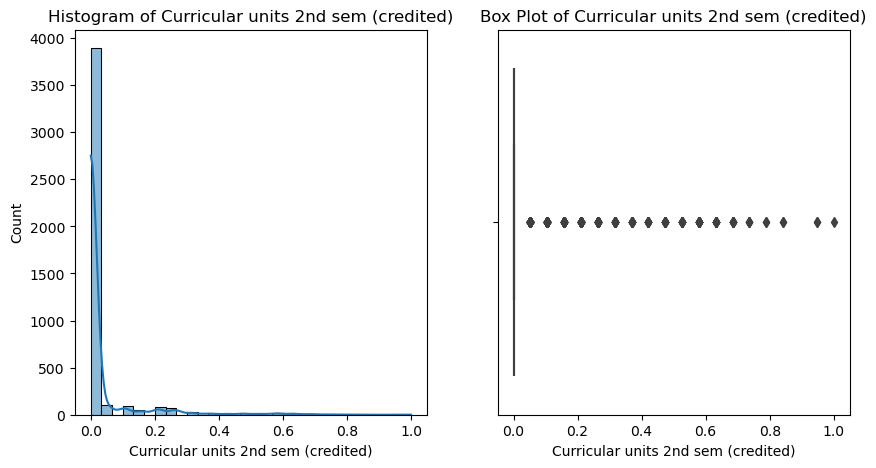

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


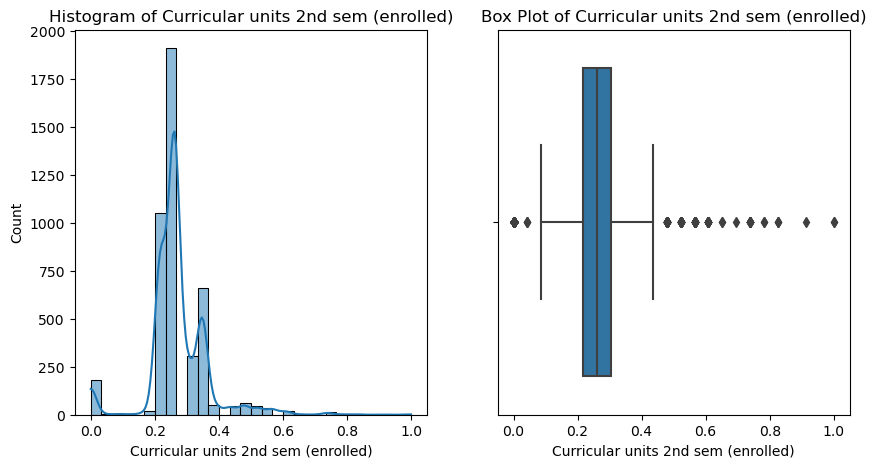

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


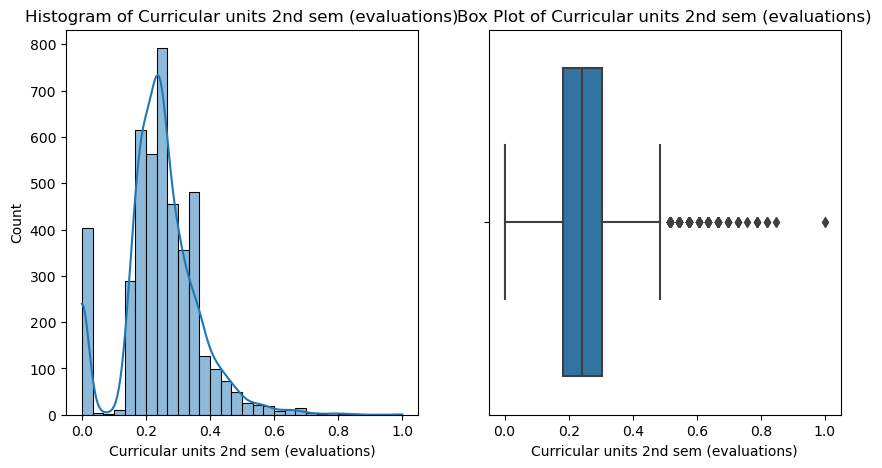

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


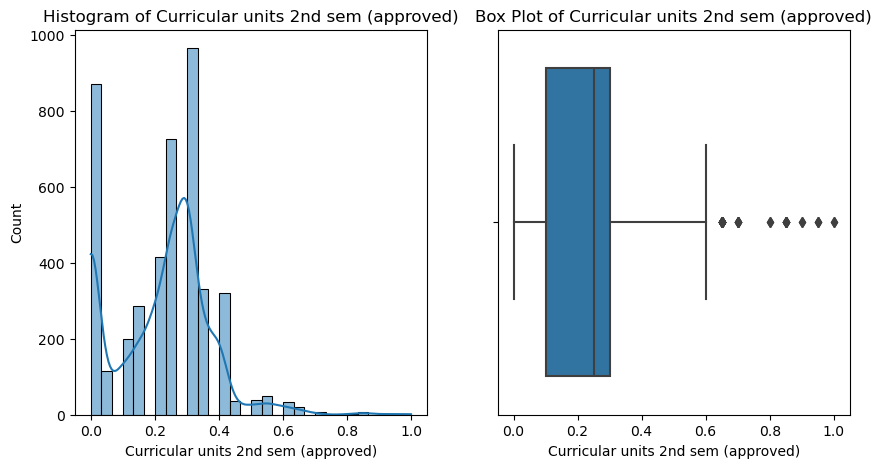

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


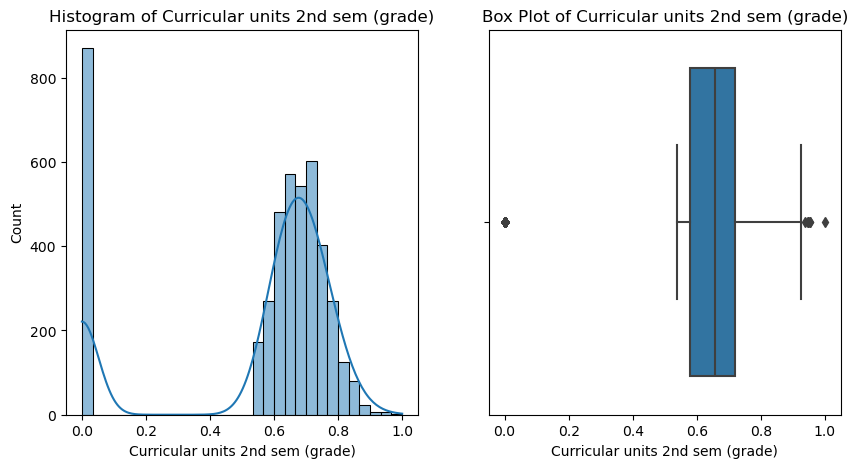

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


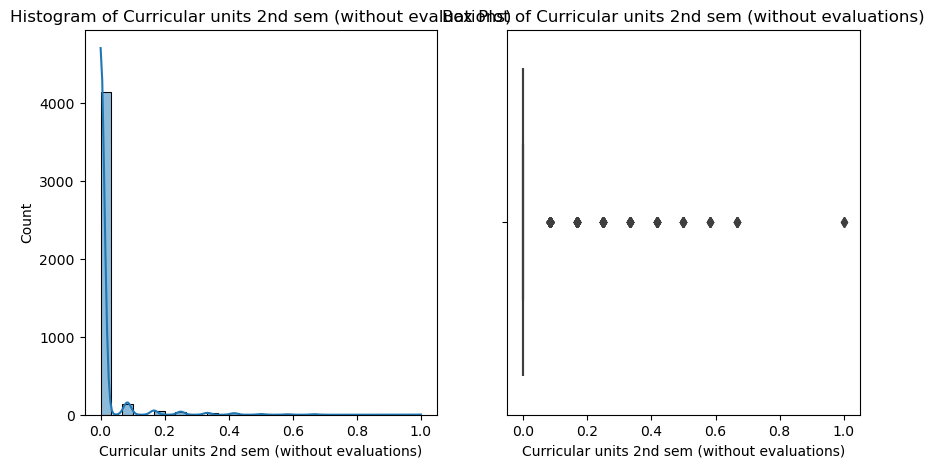

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


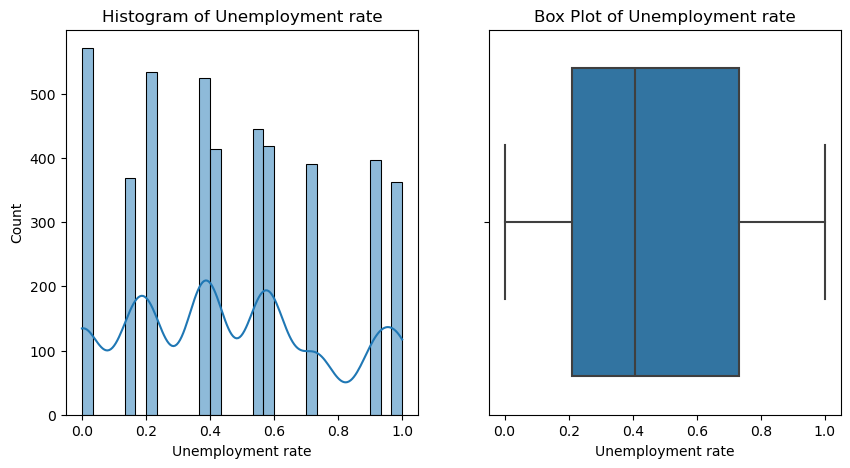

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


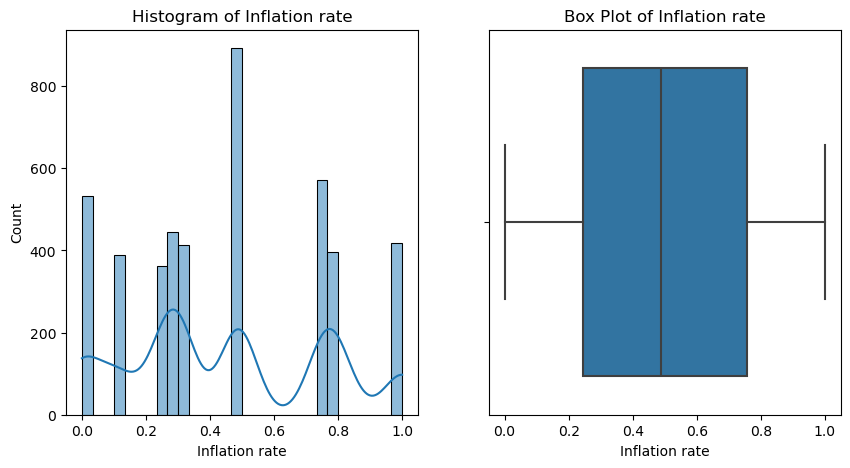

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


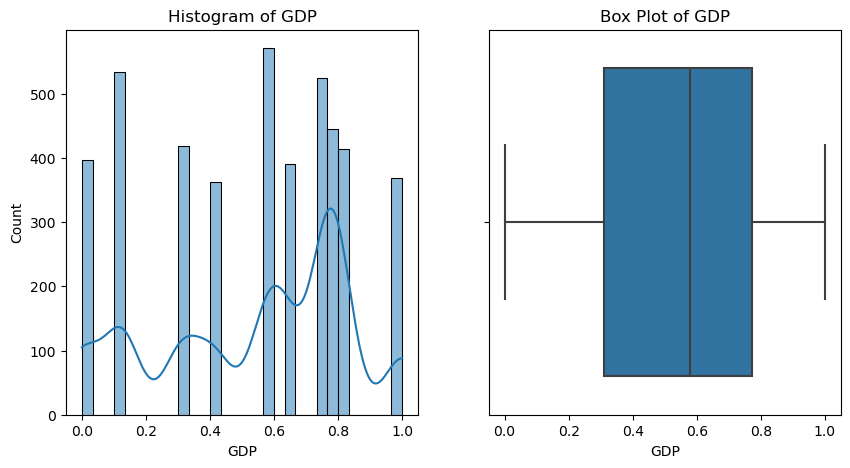

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


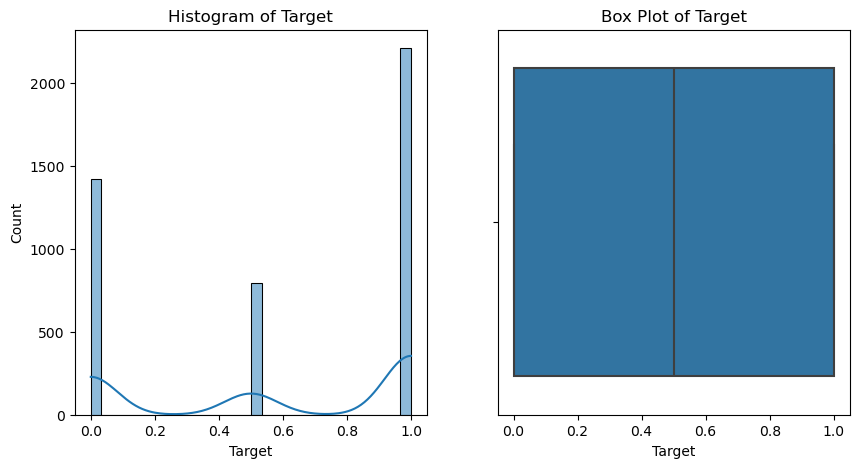

In [29]:
# Create histograms and box plots
# Loop through each numerical column to create visualizations
for col in numerical_cols:
    plt.figure(figsize=(10, 5)) # Create a new figure with specified dimensions
    plt.subplot(1, 2, 1) # Create a subplot in a 1x2 grid, position 1
    sns.histplot(df[col], bins=30, kde=True)  # Set the title for the histogram
    plt.title(f'Histogram of {col}') # Set the title for the histogram
    
    plt.subplot(1, 2, 2) # Create a subplot in a 1x2 grid, position 2
    sns.boxplot(x=df[col]) # Create a box plot for the current column
    plt.title(f'Box Plot of {col}') # Set the title for the box plot
    
    plt.show()

In [30]:
catCol = df.select_dtypes(include=['category']).columns # Get columns with categorical data

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


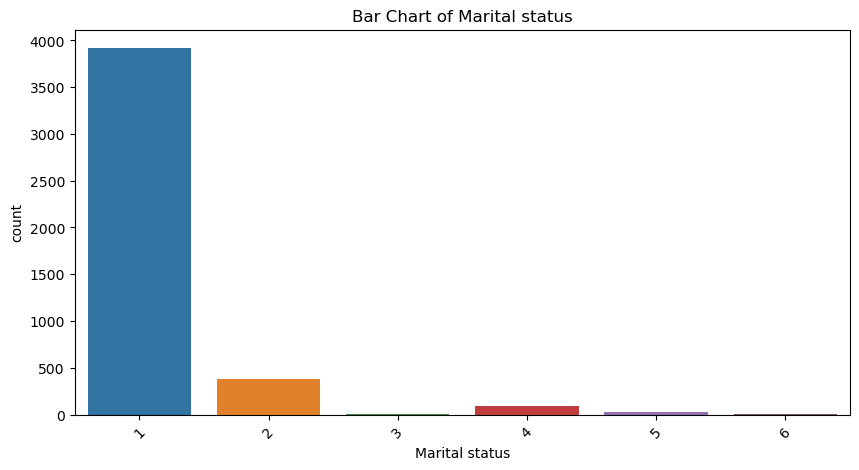

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


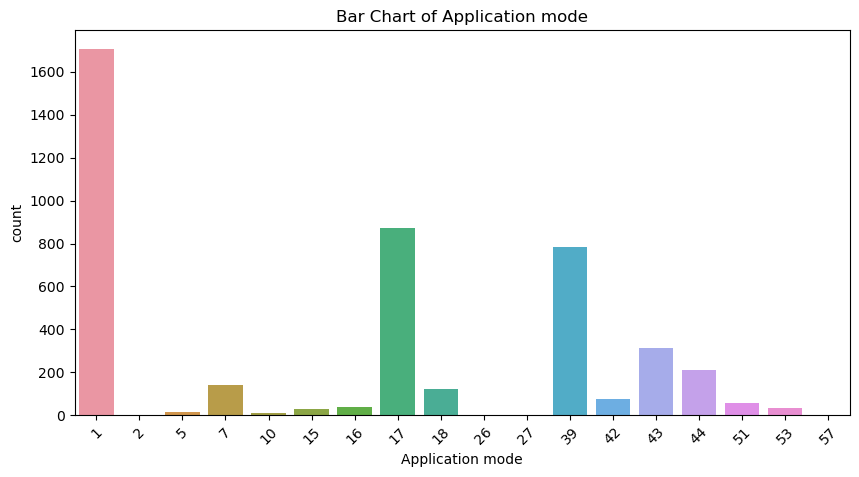

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


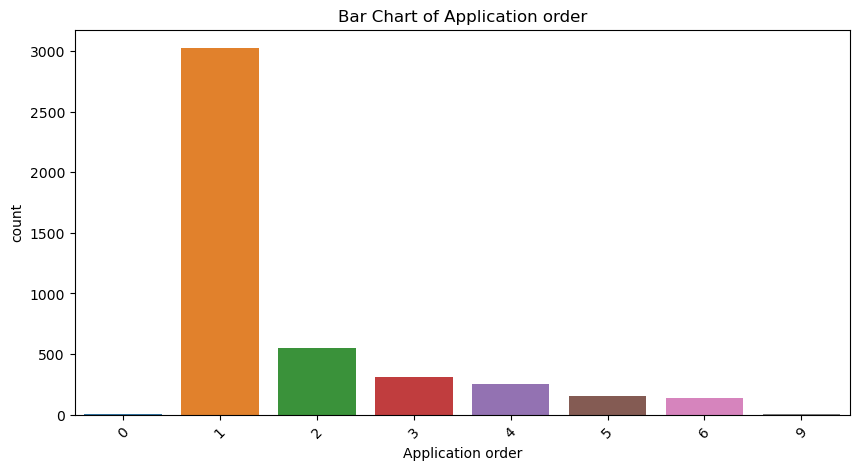

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


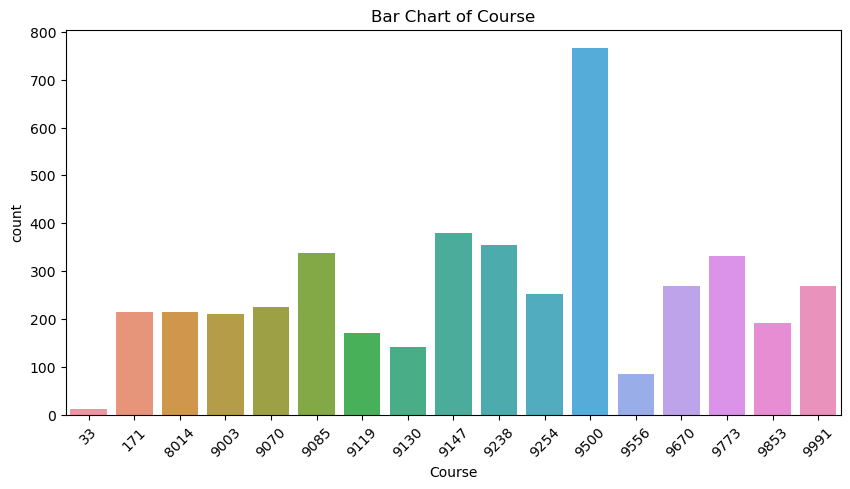

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda_3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


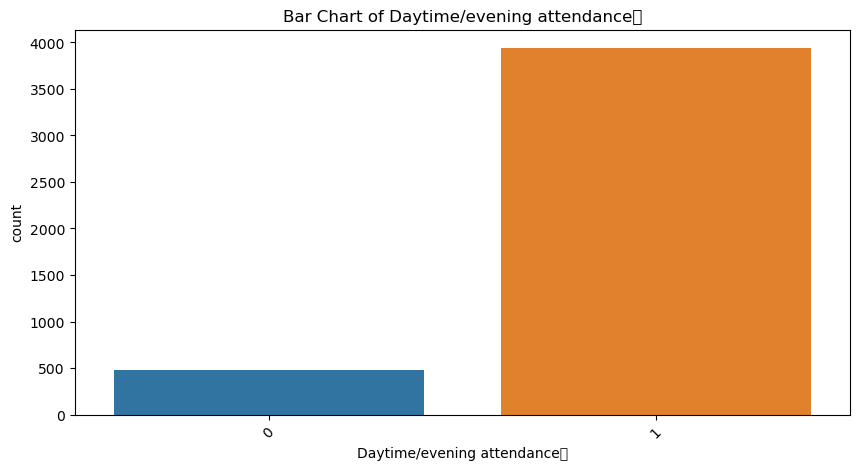

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


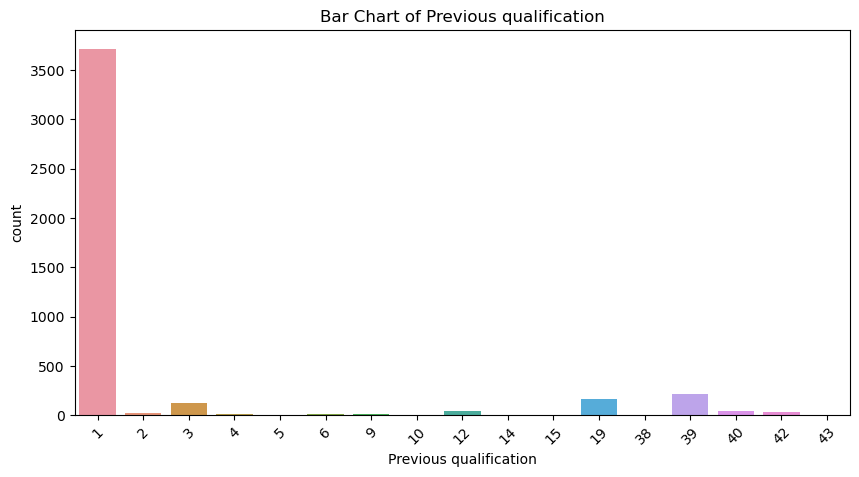

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


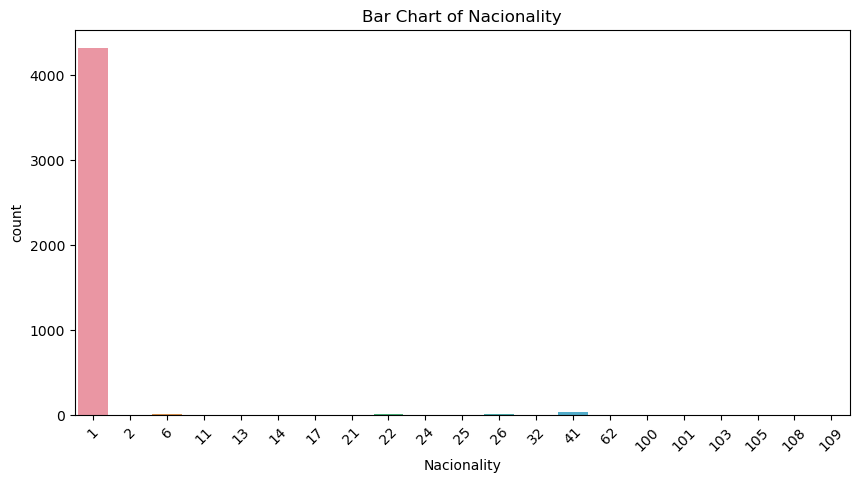

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


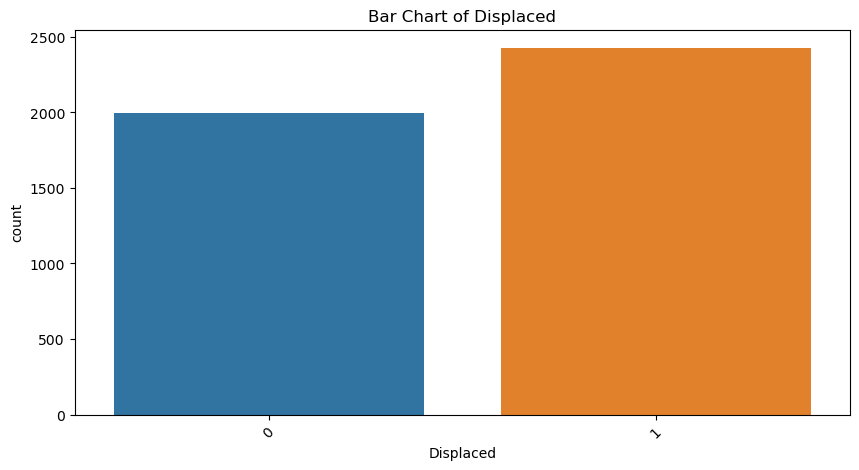

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


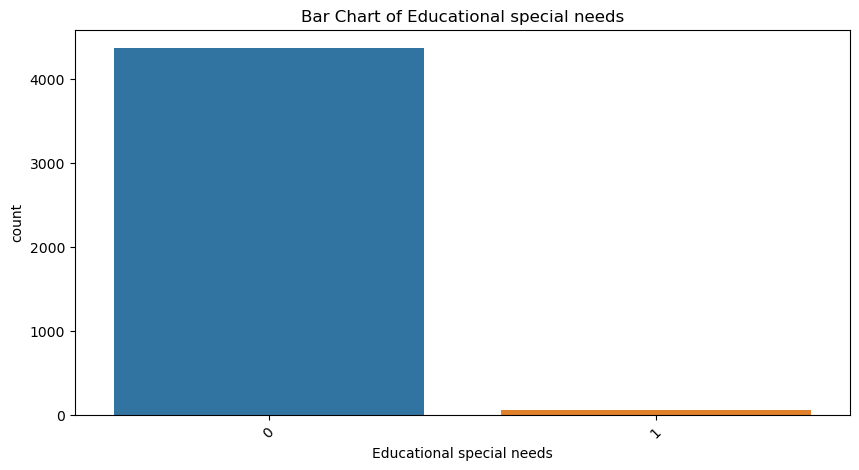

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


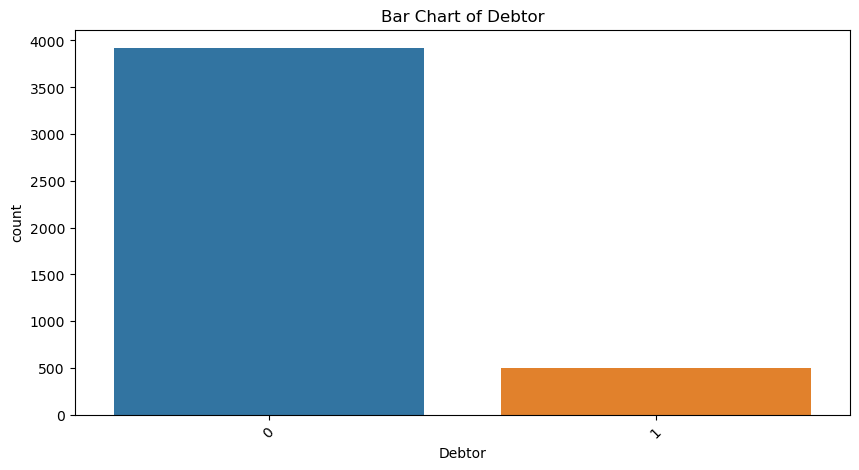

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


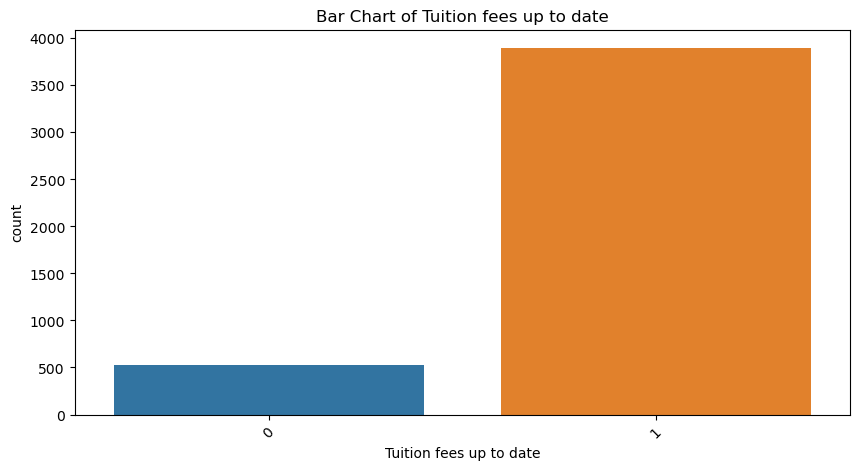

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


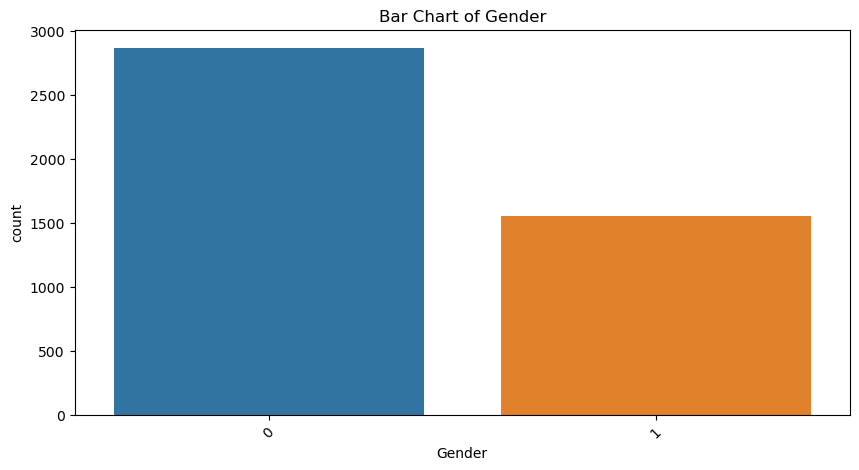

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


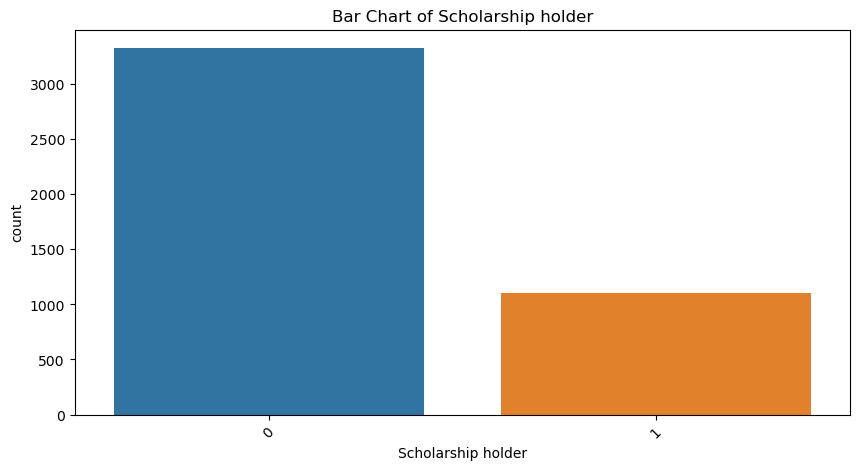

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


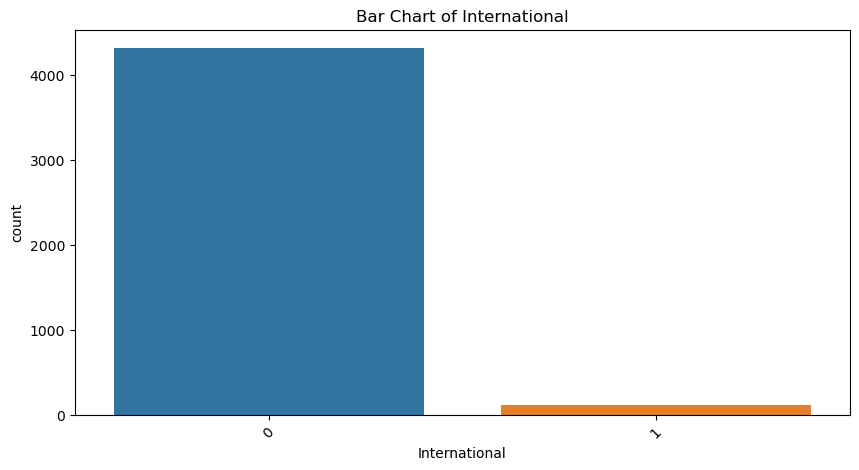

In [31]:
# Loop through each categorical column to create visualizations
for col in catCol:
    plt.figure(figsize=(10, 5))  # Create a new figure with specified dimensions 
    sns.countplot(data=df, x=col)  # Create a count plot for the current categorical column
    plt.title(f'Bar Chart of {col}')  # Set the title for the count plot
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
    plt.show()  # Display the plot

In [32]:
#Descriptive statistics
desc_stat=df.describe()
desc_stat

Previous qualification (grade)  Mother's qualification  \
count                     4424.000000             4424.000000   
mean                         0.395930                0.431673   
std                          0.138825                0.362865   
min                          0.000000                0.000000   
25%                          0.315789                0.023256   
50%                          0.401053                0.418605   
75%                          0.473684                0.837209   
max                          1.000000                1.000000   

       Father's qualification  Mother's occupation  Father's occupation  \
count             4424.000000          4424.000000          4424.000000   
mean                 0.494775             0.056499             0.056576   
std                  0.356816             0.136177             0.129554   
min                  0.000000             0.000000             0.000000   
25%                  0.046512             0.020619             0.020513   
50%                  0.418605             0.025773             0.035897   
75%                  0.837209             0.046392             0.046154   
max                  1.000000             1.000000             1.000000   

       Admission grade  Age at enrollment  \
count      4424.000000        4424.000000   
mean          0.336612           0.118210   
std           0.152442           0.143166   
min           0.000000           0.000000   
25%           0.241053           0.037736   
50%           0.327368           0.056604   
75%           0.418947           0.150943   
max           1.000000           1.000000   

       Curricular units 1st sem (credited)  \
count                          4424.000000   
mean                              0.035500   
std                               0.118025   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              0.241176   
std                               0.095391   
min                               0.000000   
25%                               0.192308   
50%                               0.230769   
75%                               0.269231   
max                               1.000000   

       Curricular units 1st sem (evaluations)  ...  \
count                             4424.000000  ...   
mean                                 0.184423  ...   
std                                  0.092869  ...   
min                                  0.000000  ...   
25%                                  0.133333  ...   
50%                                  0.177778  ...   
75%                                  0.222222  ...   
max                                  1.000000  ...   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.028517   
std                               0.100976   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              0.270963   
std                               0.095476   
min                               0.000000   
25%                               0.217391   
50%                               0.260870   
75%                               0.304348   
max                               1.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 0.244342   
std                                  0.119635

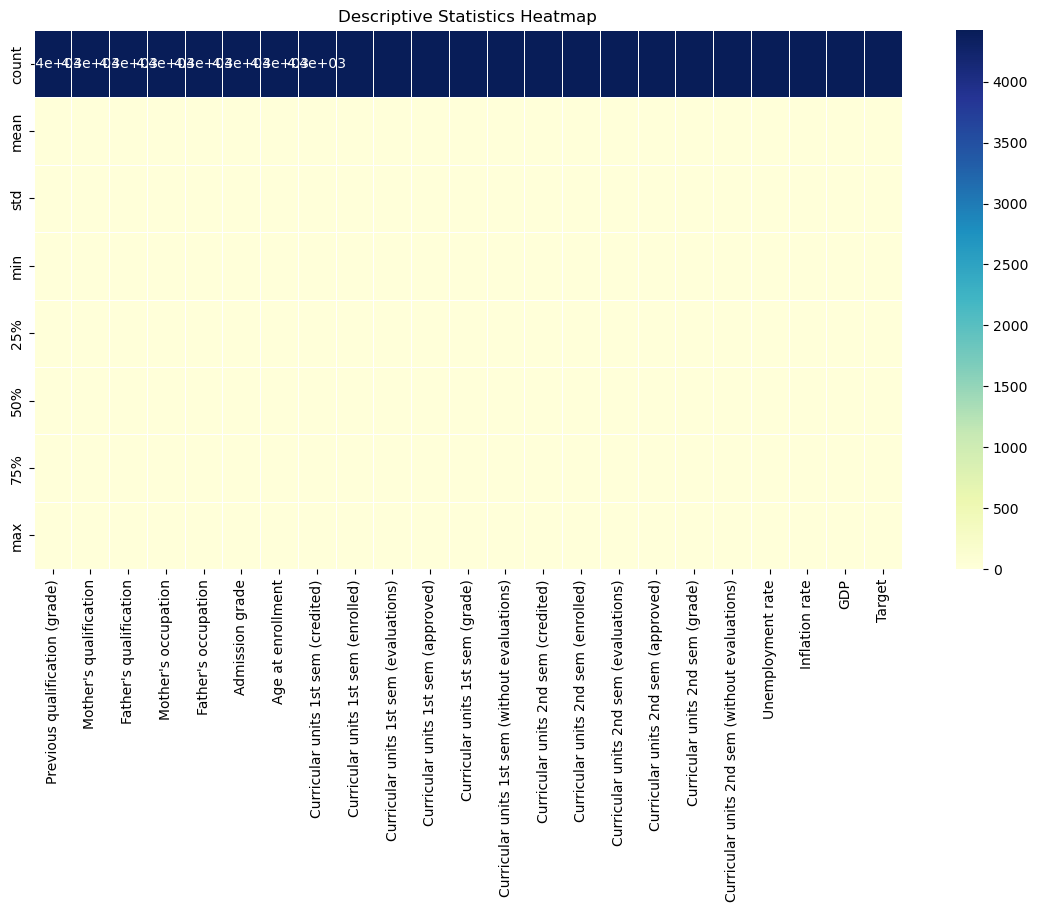

In [33]:
# Heatmap for visualizing descriptive statistics
plt.figure(figsize=(14, 7))  # Create a new figure with specified dimensions (14 inches wide, 7 inches tall)

sns.heatmap(desc_stat,annot=True, cmap='YlGnBu', linewidths=0.5)  # Create a heatmap from the descriptive statistics DataFrame
# - desc_stats: DataFrame containing descriptive statistics (mean, median, etc.)
# - annot=True: Display the data values on the heatmap
# - cmap='coolwarm': Use the 'coolwarm' color palette for better visual distinction

plt.title('Descriptive Statistics Heatmap')  # Set the title for the heatmap
plt.show() 

C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

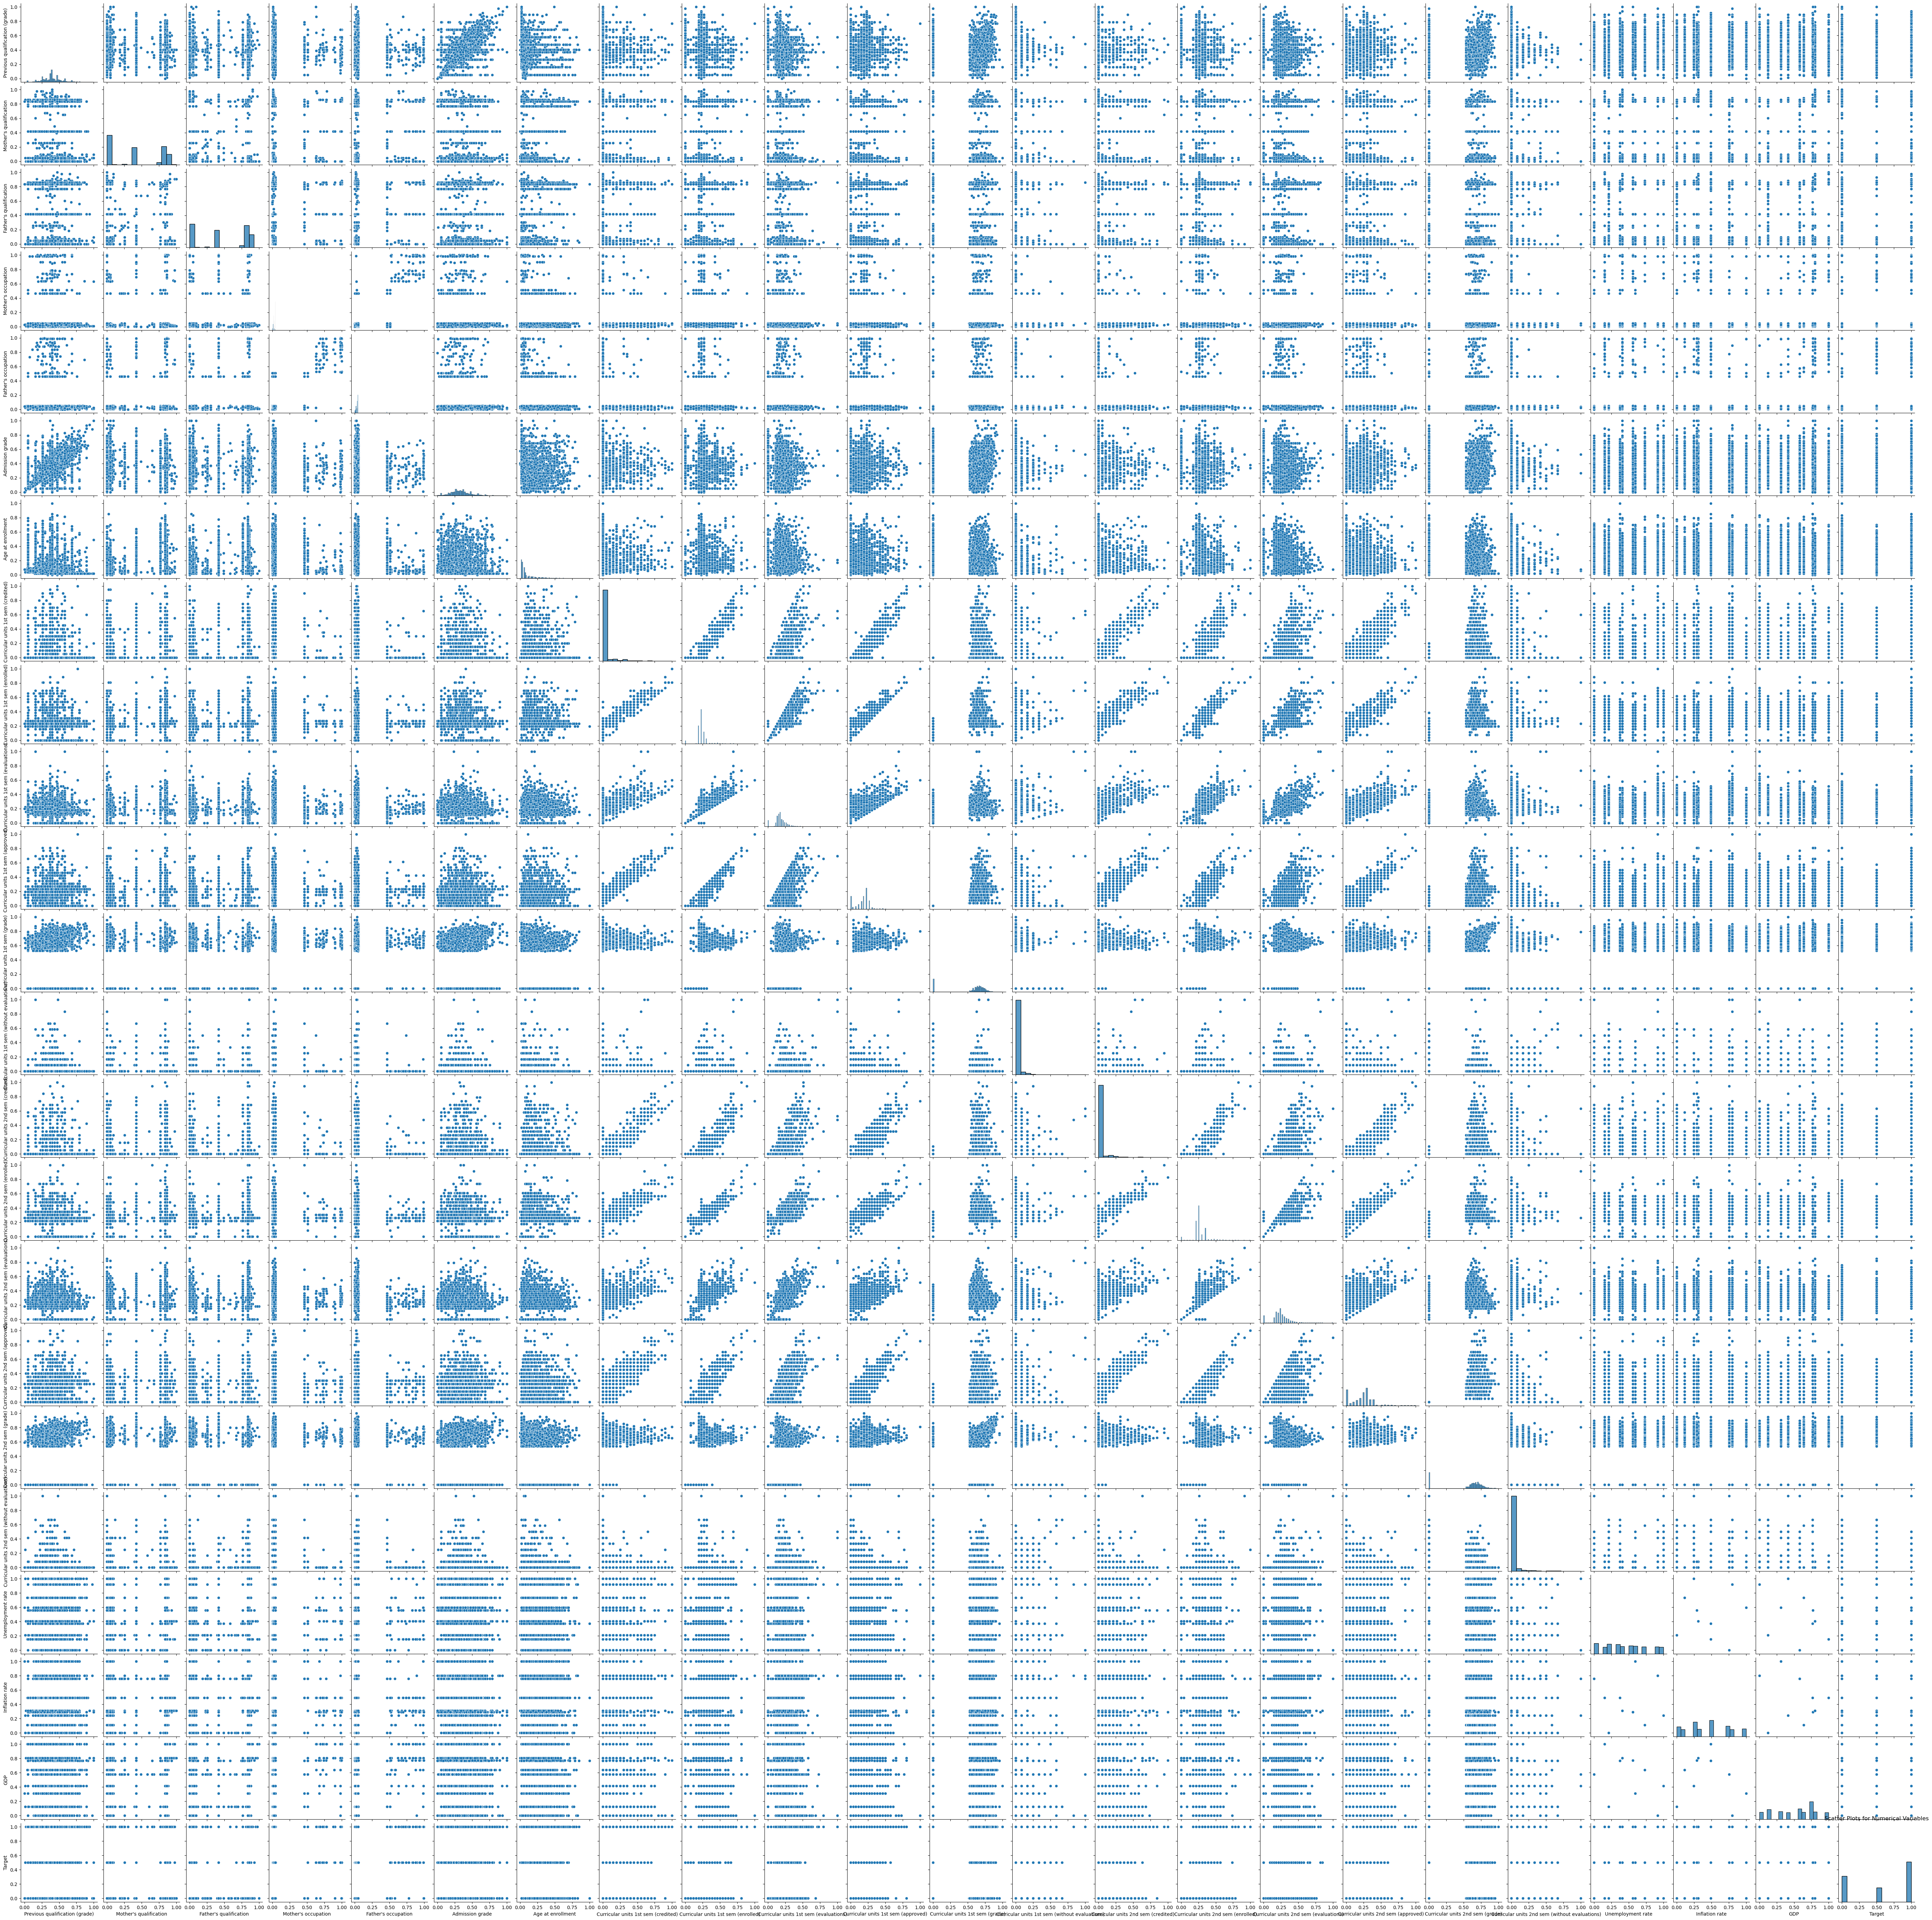

In [34]:
#Scattered plots for pair of numerical variables
# Scatter plots for pairs of numerical variables
sns.pairplot(df[numerical_cols])  # Create a pair plot for the numerical columns in the DataFrame
# This function generates scatter plots for each pair of numerical variables, as well as histograms for the distributions on the diagonal.
plt.title('Scatter Plots for Numerical Variables')  # Set the title for the pair plot
plt.show()  # Display the pair plot

In [35]:
cat_Col = df1.select_dtypes(include=['object']).columns # Get columns with categorical data

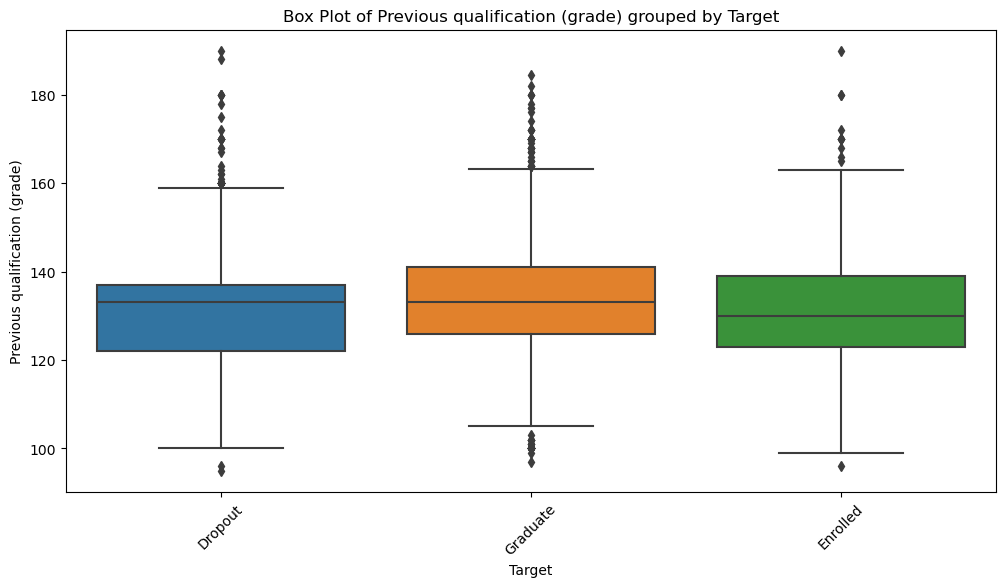

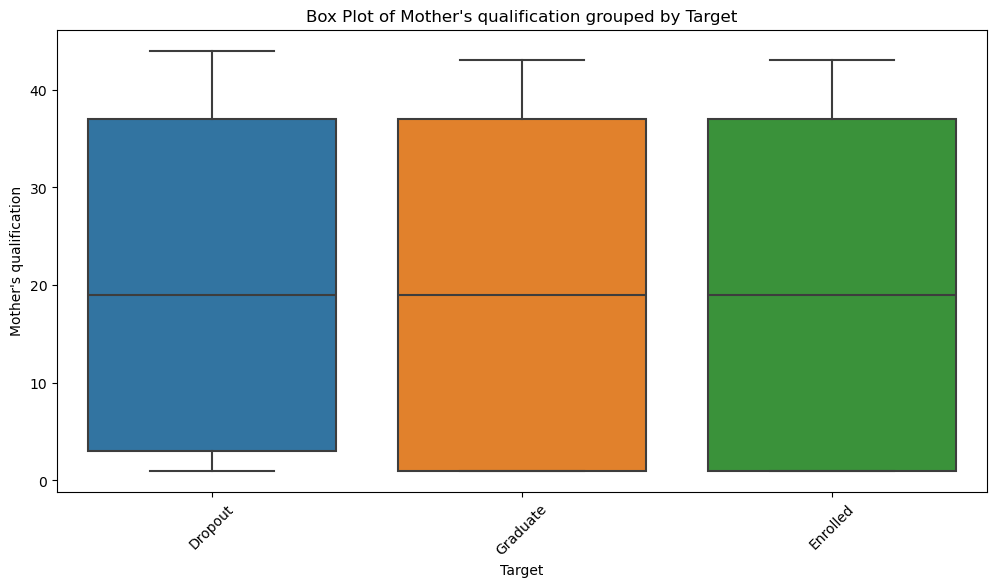

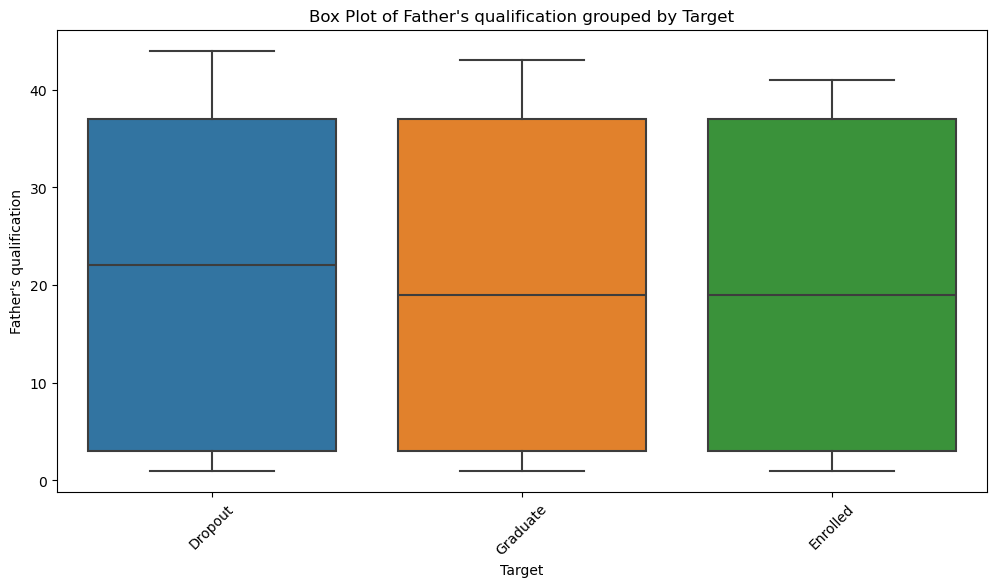

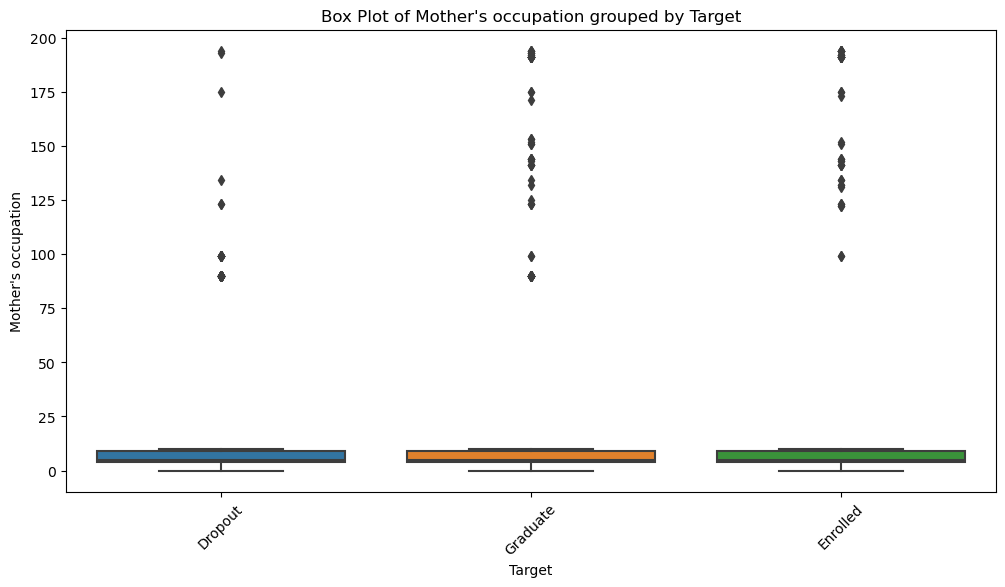

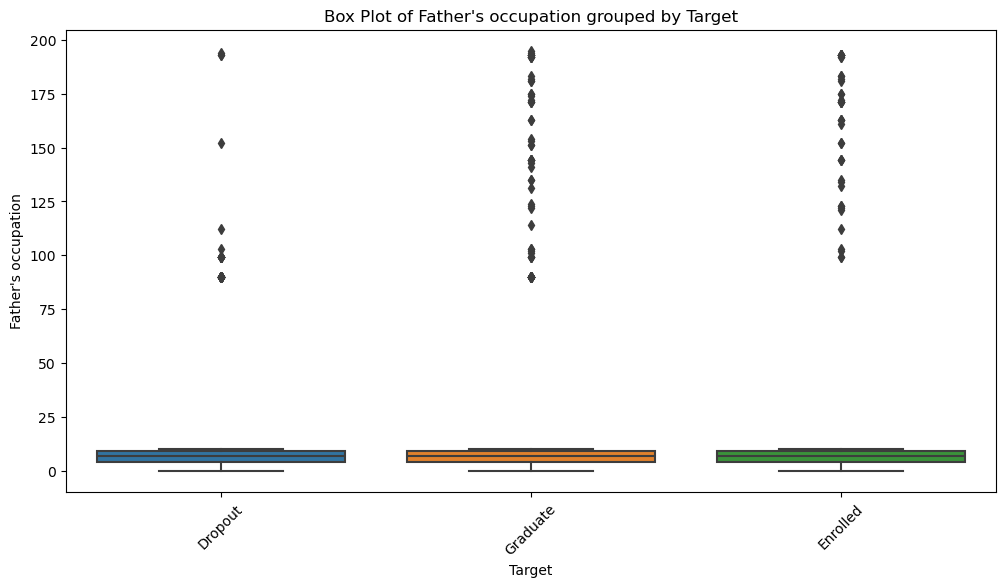

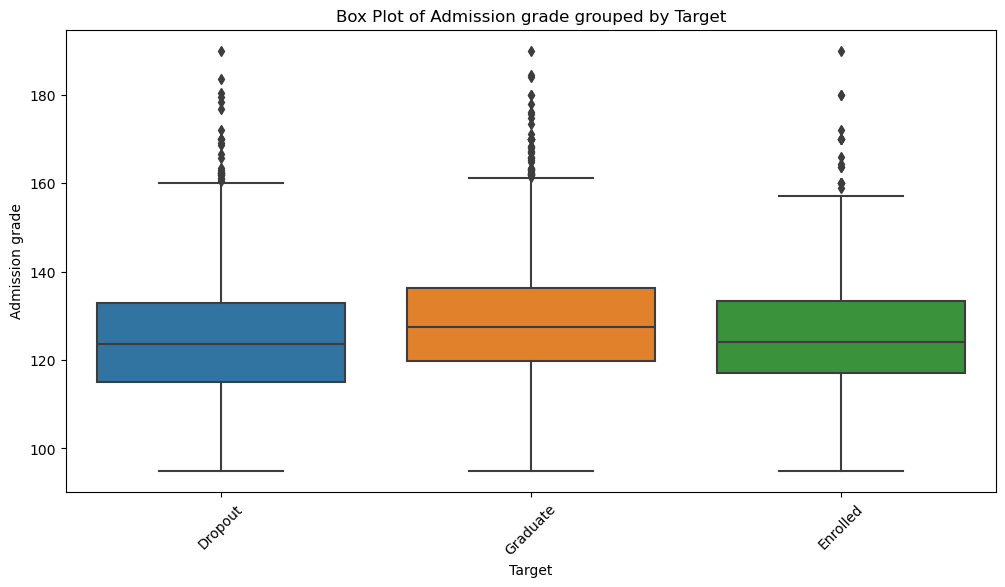

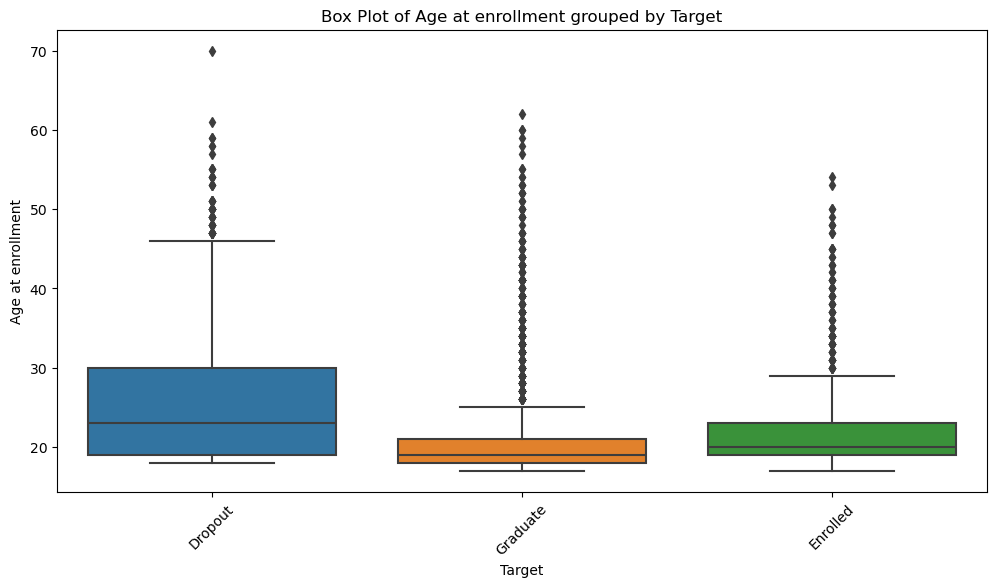

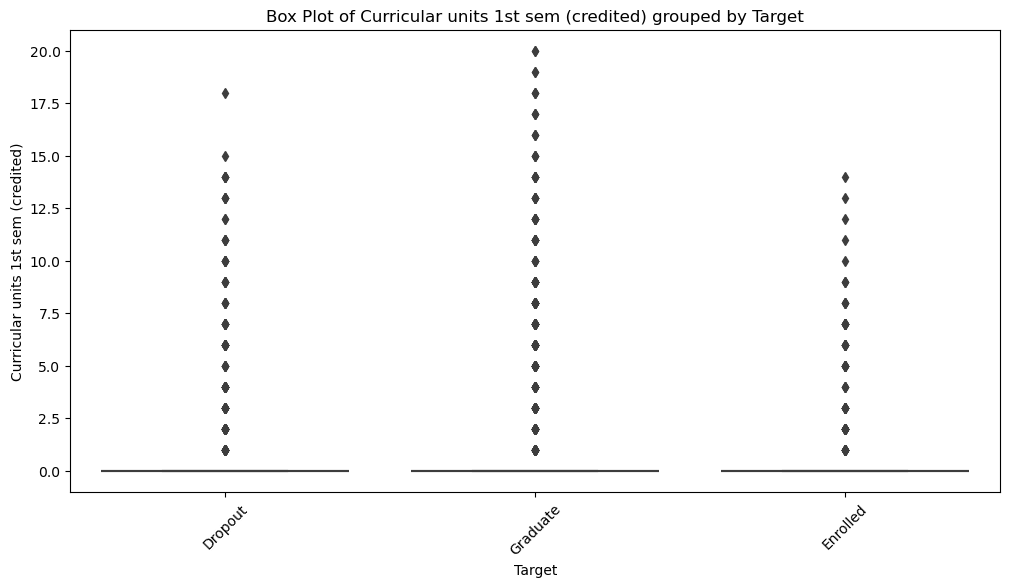

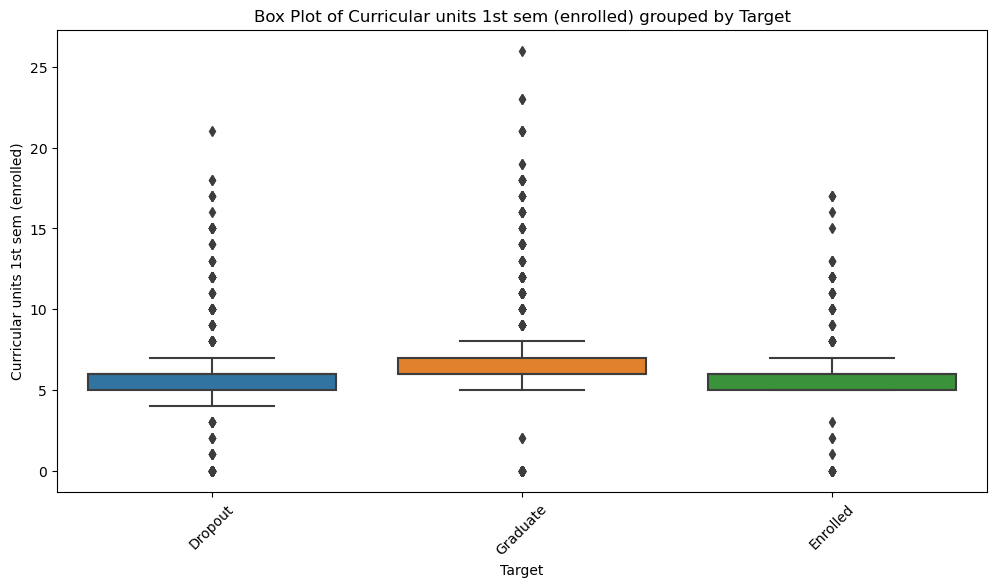

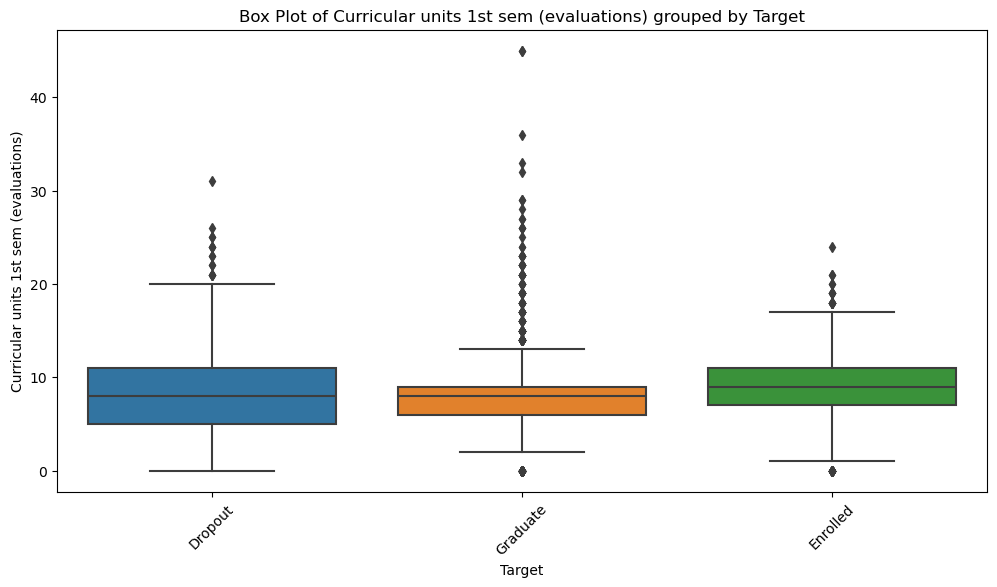

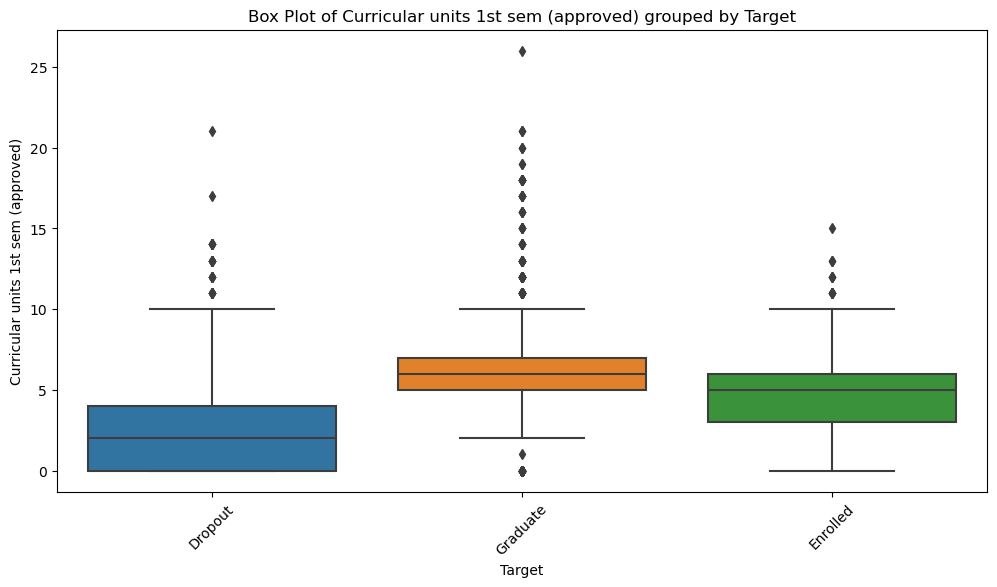

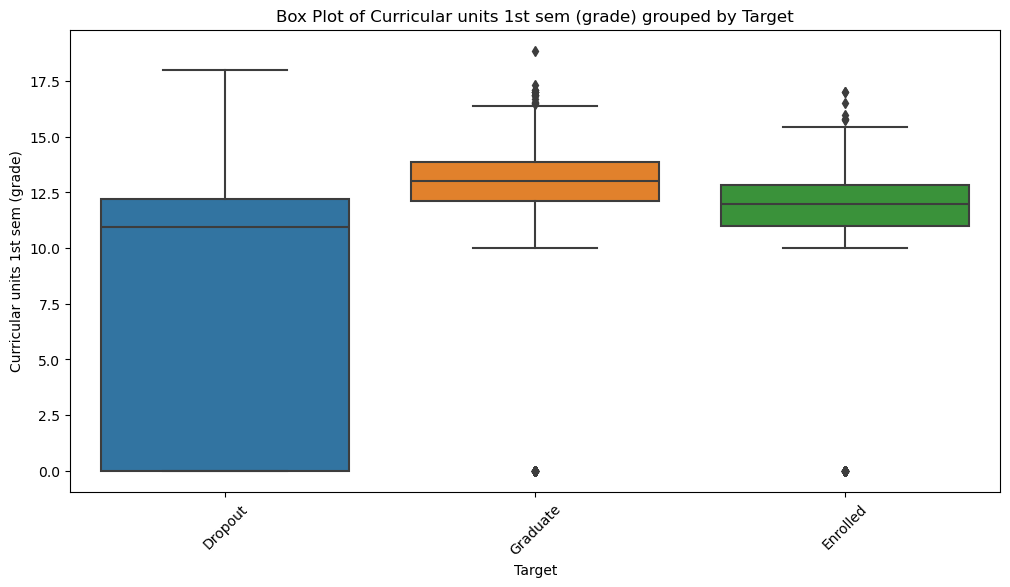

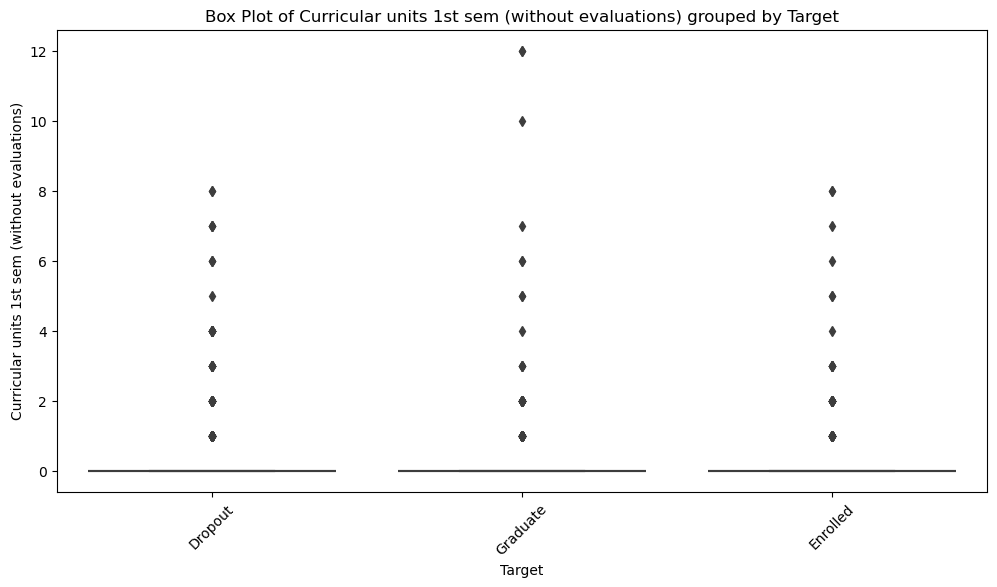

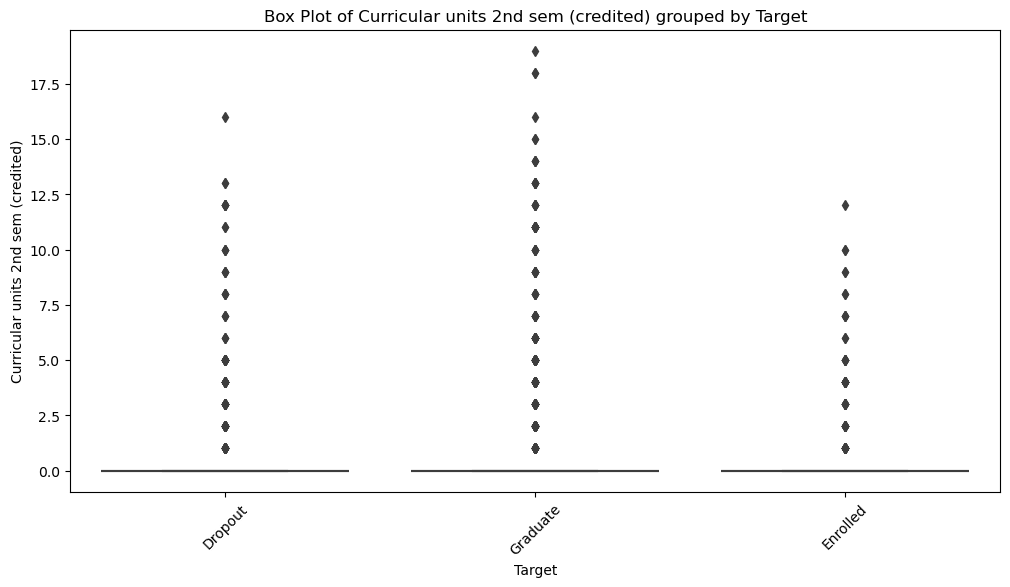

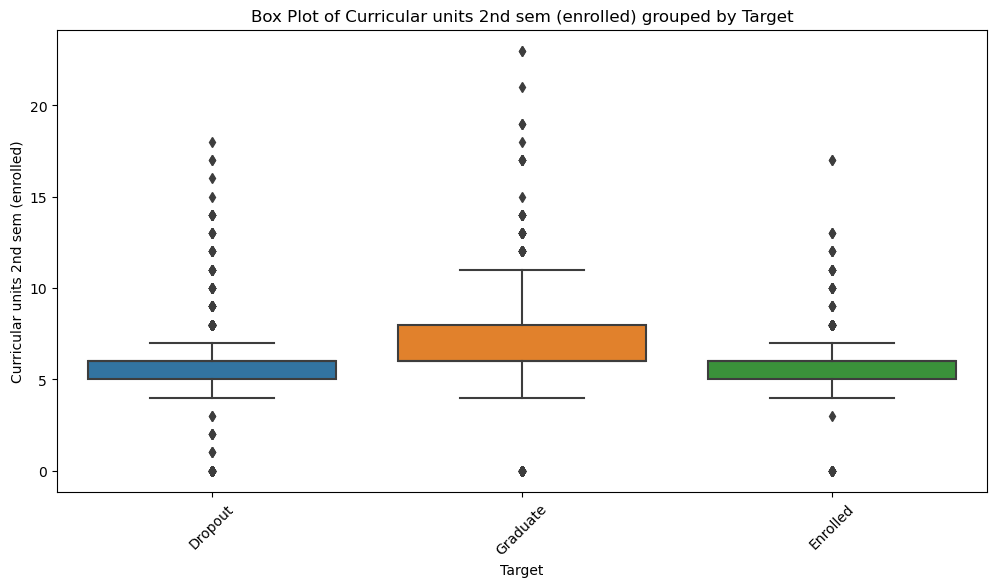

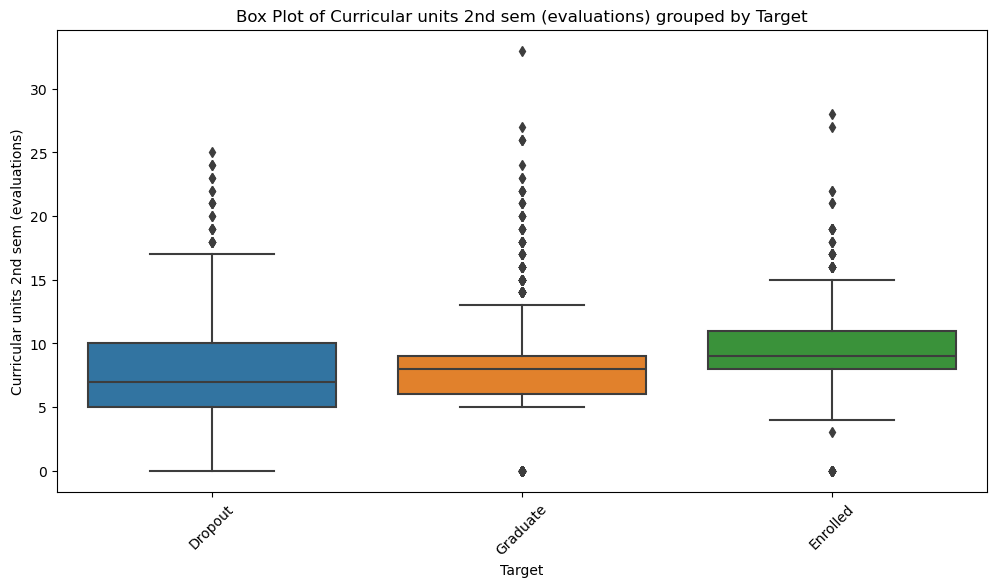

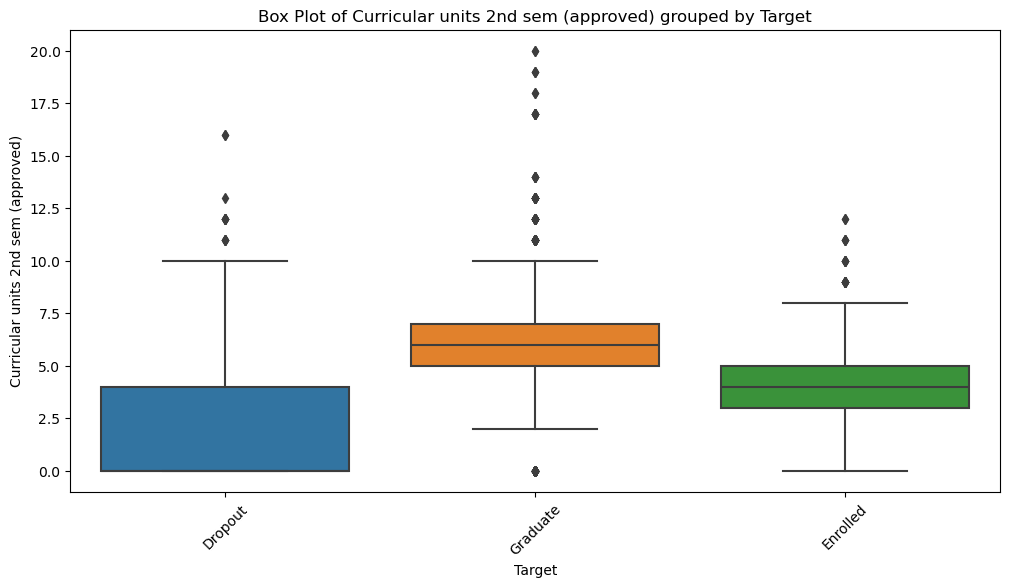

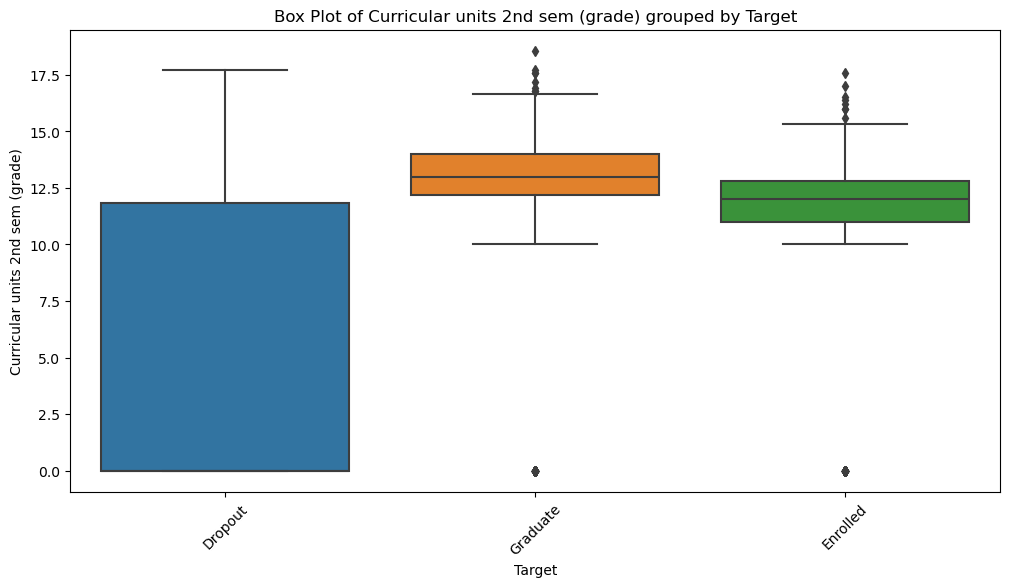

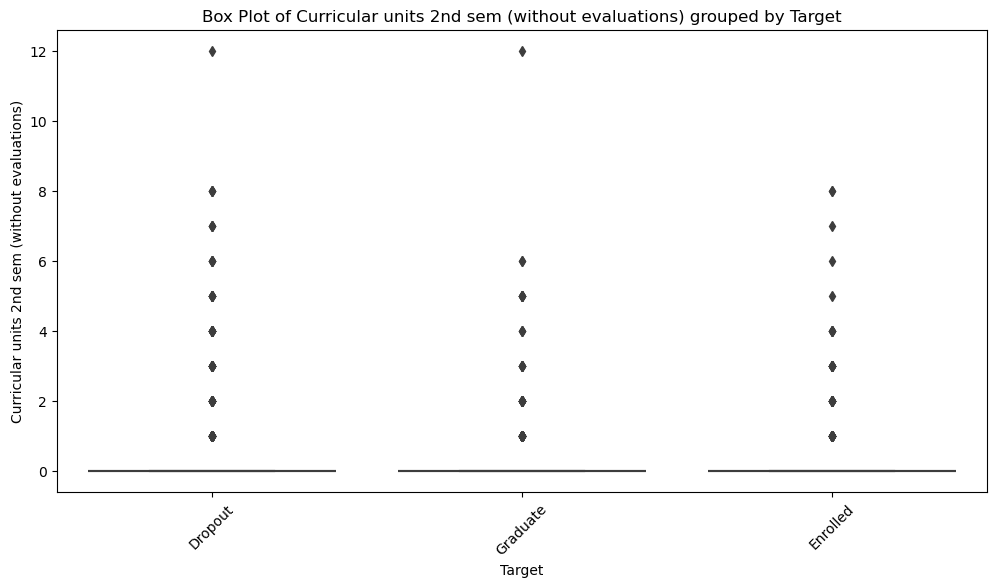

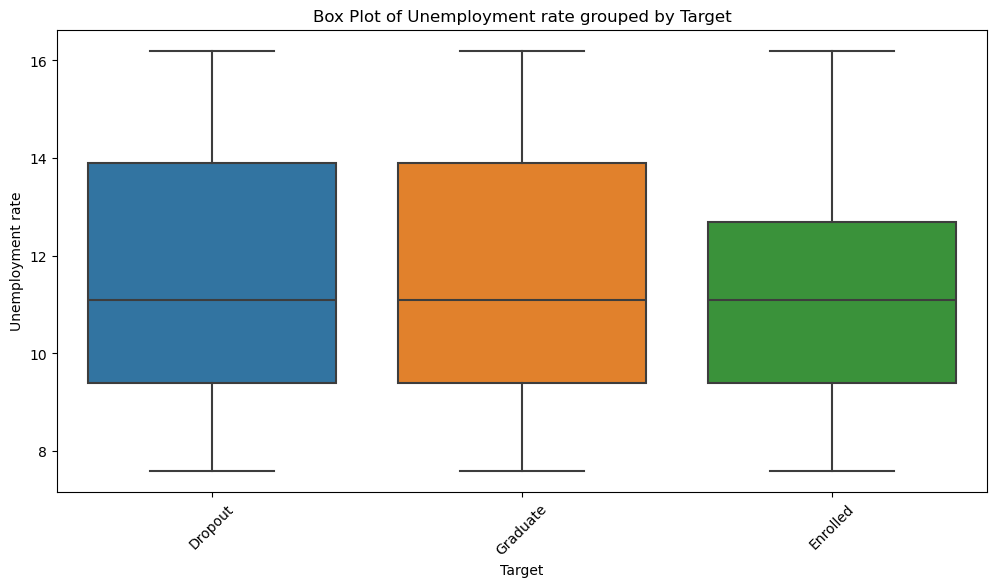

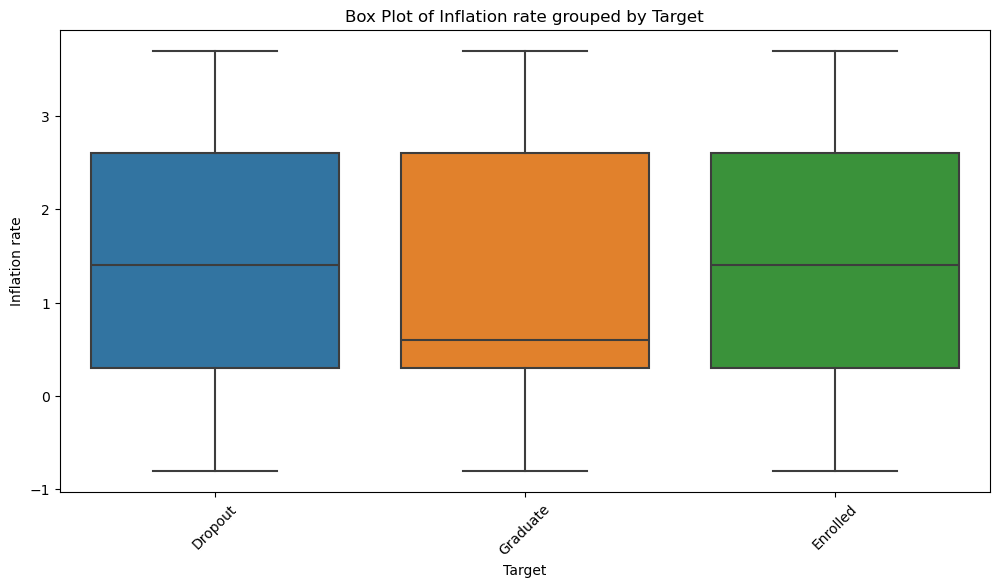

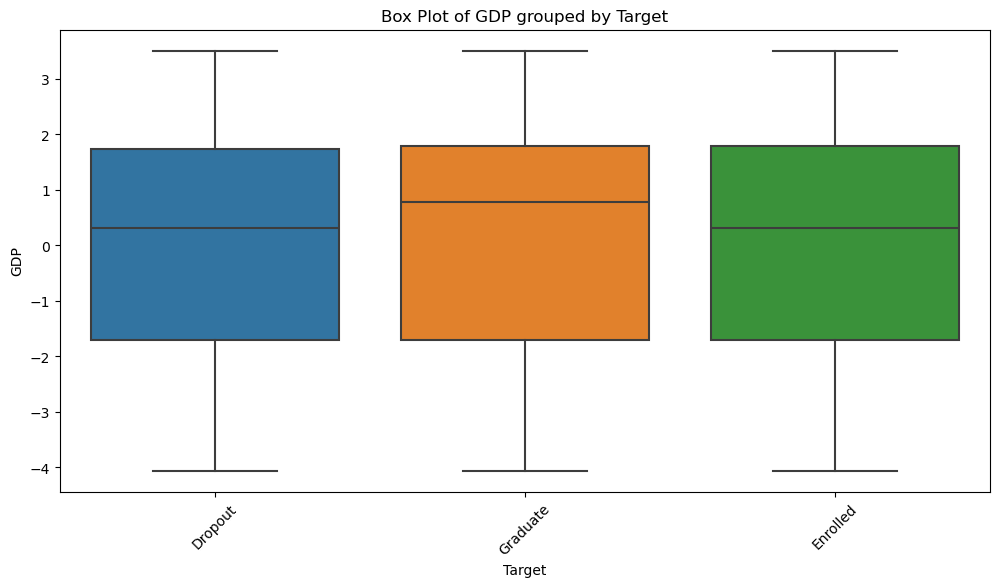

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

In [36]:
# Box Plots of Numerical Variables Grouped by Categorical Variables
for cat_col in cat_Col:  # Loop through each categorical column
    for num_col in numerical_cols:  # Loop through each numerical column
        plt.figure(figsize=(12, 6))  # Create a new figure with specified dimensions (12 inches wide, 6 inches tall)
        sns.boxplot(x=df1[cat_col], y=df1[num_col])  # Create a box plot with the categorical variable on the x-axis and the numerical variable on the y-axis
        plt.title(f'Box Plot of {num_col} grouped by {cat_col}')  # Set the title for the box plot
        plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
        plt.show()  # Display the box plot

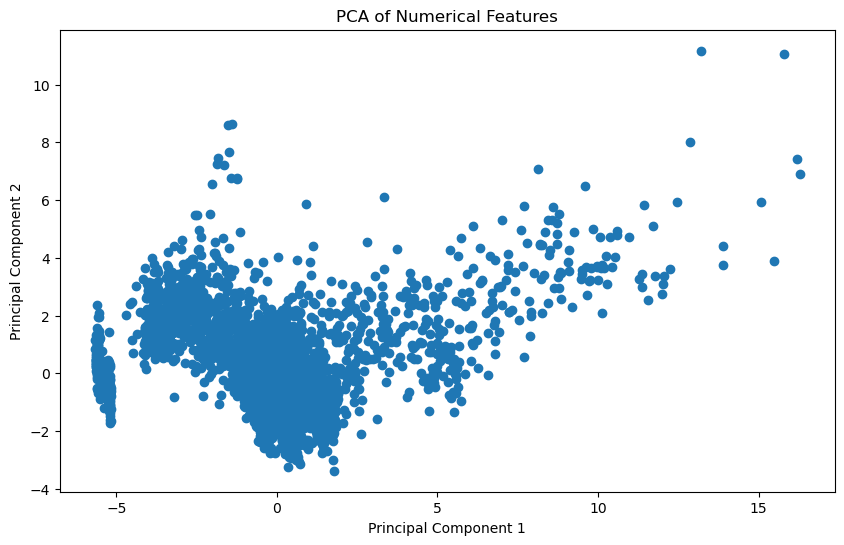

In [59]:
# Principal Component Analysis (PCA)
# Standardizing the data
scaler = StandardScaler()  # Create an instance of StandardScaler
scaled_data = scaler.fit_transform(df[numerical_cols])  # Standardize the numerical data (mean=0, variance=1)

# PCA
pca = PCA(n_components=2)  # Initialize PCA to reduce data to 2 components
pca_result = pca.fit_transform(scaled_data)  # Fit PCA on the scaled data and transform it

# Plotting PCA results
plt.figure(figsize=(10, 6))  # Create a new figure with specified dimensions (10 inches wide, 6 inches tall)
plt.scatter(pca_result[:, 0], pca_result[:, 1])  # Create a scatter plot of the first two principal components
plt.title('PCA of Numerical Features')  # Set the title for the plot
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.show()  # Display the scatter plot of PCA results

In [60]:
# Interactive scatter plot
fig = px.scatter(df, x='Curricular units 1st sem (evaluations)', y='Age at enrollment', color='Target', title='Interactive Scatter Plot')  
# - df: DataFrame containing the data to be plotted

NameError: name 'px' is not defined

In [ ]:
# streamlit_app.py

# Importing necessary libraries
import streamlit as st

# Set page title
st.title("Descriptive Statistics Dashboard")

# Load dataset (Iris dataset for this example)
@st.cache_data
def load_data():
    return sns.load_dataset('iris')

# Display the dataset
st.subheader("School Drop-Out Data set")
st.write(df.head())

# Descriptive statistics
st.subheader("Descriptive Statistics")
st.write(df1.describe())

# Sidebar for selecting variables to visualize
st.sidebar.header("Select Boxplot Variables")
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

selected_numerical_var = st.sidebar.selectbox("Numerical Variable", numerical_cols)
selected_categorical_var = st.sidebar.selectbox("Categorical Variable", categorical_cols)

# Create a boxplot based on selected variables
st.subheader(f"Boxplot of {selected_numerical_var} grouped by {selected_categorical_var}")
plt.figure(figsize=(8, 6))
sns.boxplot(x=selected_categorical_var, y=selected_numerical_var, data=df1)
st.pyplot(plt)

# Display heatmap of descriptive statistics
st.subheader("Heatmap of Descriptive Statistics")
desc_stats = df.describe()

plt.figure(figsize=(10, 6))
sns.heatmap(desc_stats, annot=True, cmap='YlGnBu', linewidths=0.5)
st.pyplot(plt)
